# Business Problem

A skin care store on Amazon asked us to help them retain their customers because their churn rate had been increasing in recent years and this was resulting in a huge loss of revenue. They used to have a 30% churn rate and were able to ensure profitability, but now they have a 54% churn rate and have started losing money. Our goal was to help this client identify/recognize as many as customers, who have high risk of churning. This way we can take action to retain these customers.

From the client, we got 36,992 customer records with 22 features (age, gender, membership, etc.) and churn status. We will: 
1) EDA and feature engineering
2) Provide business insights
3) deployed pipelines of data preprocessing and predictive models to identify the high risk churn customers
4) Provide recommendation/solutions to the clients base on the model results

In [175]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [519]:
df = pd.read_csv('../data/churn.csv')

In [520]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

# EDA

There are 14.67% missing region_category, 14.7% are '?' in joined_through_referral, 9.3% missing in points_in_wallet, and 0.77% missing in preferred_offer_types

Data is balance data. The churn rate is 54%.

New features can be generated for modeling fit.

Outliears are handel as missing data, missing date be handeled later base on if it is numerical or catagorical.

Some feature have unknow, or weird sign, we will handel those base on the situation (refer to the conmment at each cell below for the feature)

In [178]:
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

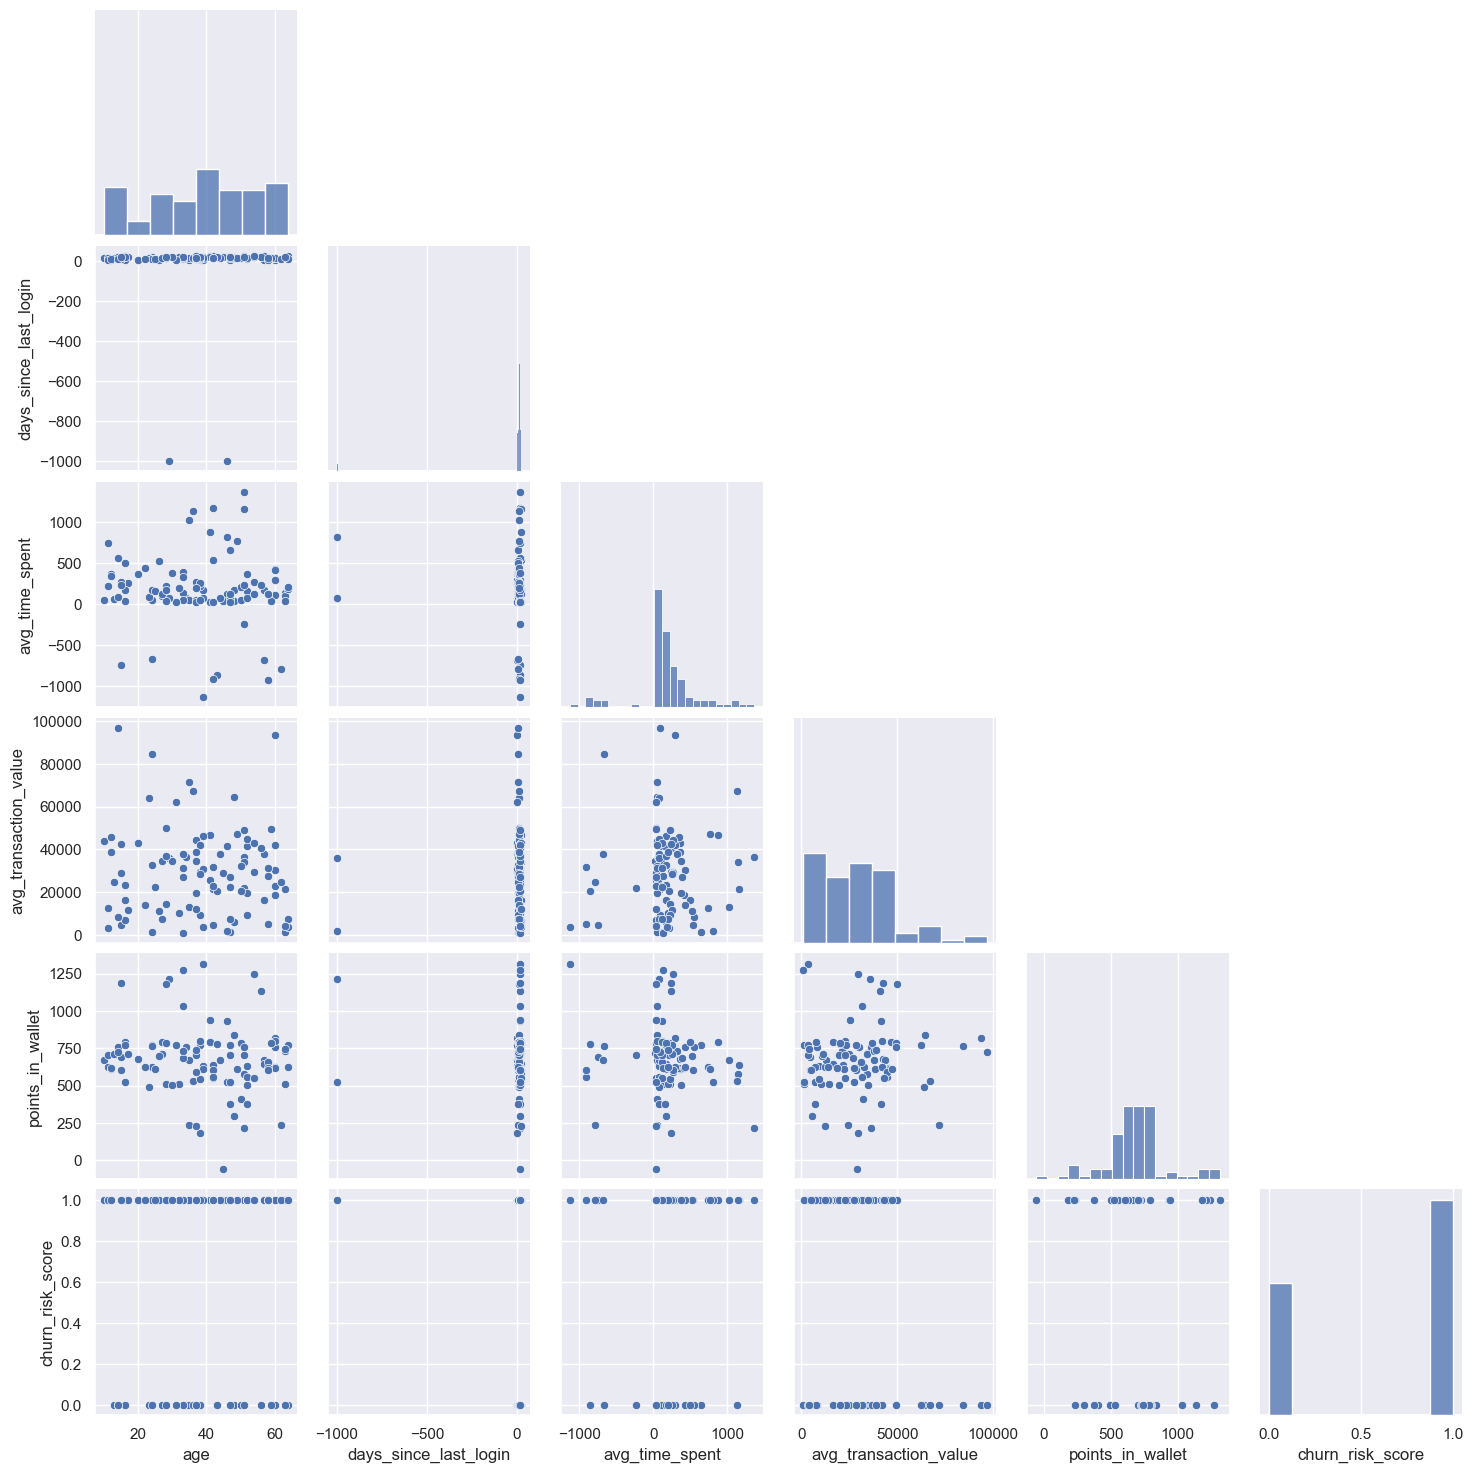

In [180]:
# quick look the numeric data, and their distribution
# we will check this plot later after preproces
import seaborn as sns
sample = df.dropna().sample(n =100)
sns.pairplot(sample, corner = True)

## Missing data

We will check the missing data in the data set

In [181]:
def missing_df(df):  
    miss_cnt = []
    miss_perc = []
    for i in df.columns:
        # count number of rows with missing values
        n_miss = df[[i]].isnull().sum()[0]
        miss_cnt.append(n_miss)
        miss_perc.append(n_miss * 100 / len(df[[i]]))
        #print(i, ': Missing: %d (%.1f%%)' % (n_miss, perc))

    miss_val = pd.DataFrame({'col_name': df.columns, 'missing_val': miss_cnt, 'missing_percentage':miss_perc})
    miss_val.sort_values(by = 'missing_val', ascending=False, inplace=True)
    return miss_val

def plot_missing_pct(missing_df):
    missing_df.index = missing_df.col_name
    missing_df[['missing_percentage']].plot(kind = 'bar',figsize = (14, 3), title = 'Missing percentage')
    
    
missing = missing_df(df)
#plot_missing_pct(missing)

In [182]:
missing

,col_name,missing_val,missing_percentage
3,region_category,5428,14.673443
16,points_in_wallet,3443,9.307418
8,preferred_offer_types,288,0.778547
0,age,0,0.000000
13,avg_time_spent,0,0.000000
21,feedback,0,0.000000
20,complaint_status,0,0.000000
19,past_complaint,0,0.000000
18,offer_application_preference,0,0.000000
17,used_special_discount,0,0.000000


## data distribution, outlier, manipulate

<AxesSubplot: title={'center': 'Age'}, ylabel='Frequency'>

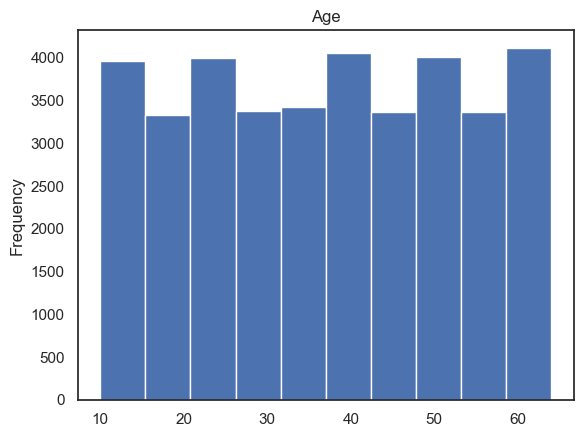

In [513]:
df.age.plot(kind = 'hist', title = 'Age')

<AxesSubplot: title={'center': 'Gender'}>

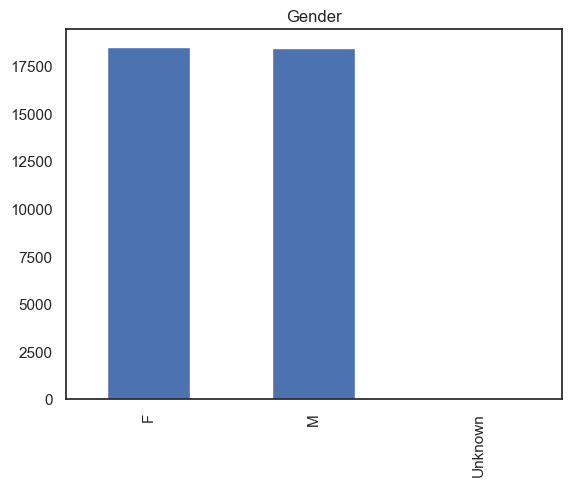

In [514]:
## unique value in geneder
df.gender.value_counts().plot(kind = 'bar', title = 'Gender')

In [185]:
# security_no is useless, it can be dropped
sum(df.security_no.value_counts() ==2)

0

<AxesSubplot: title={'center': 'Region'}>

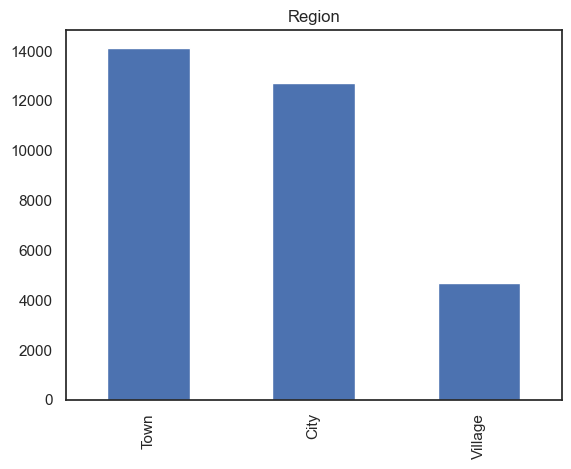

In [515]:
df.region_category.value_counts().plot(kind = 'bar', title = 'Region')

<AxesSubplot: title={'center': 'Membership'}>

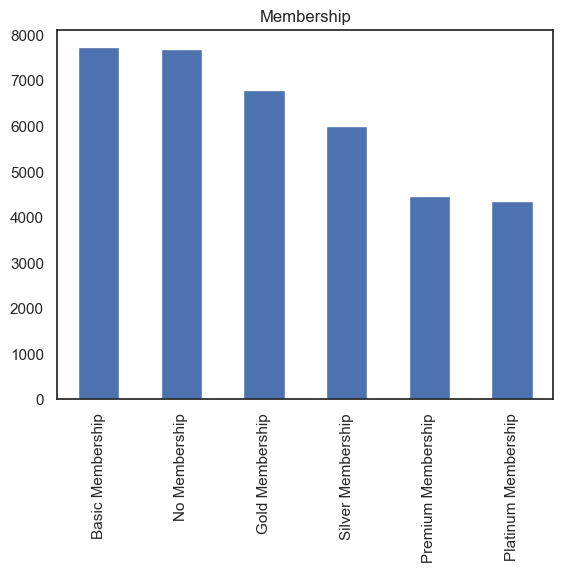

In [516]:
# this cat can be labeled as ordinary variable
df.membership_category.value_counts().plot(kind = 'bar', title = 'Membership')

<AxesSubplot: >

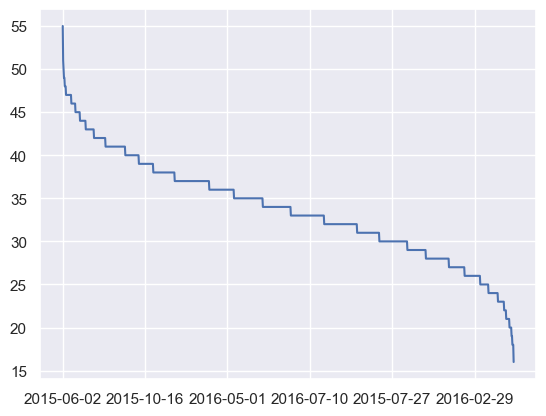

In [188]:
# new feature can be how long the customer with the busines
df.joining_date.value_counts().plot()

In [189]:
# ? need to change to Unknow
df.joined_through_referral.value_counts()
df['joined_through_referral'] = df.joined_through_referral.map(lambda x: 'unknown' if x == '?' else x)

In [190]:
df['referral_id']= df.referral_id.map(lambda x: 'Unknown' if x == 'xxxxxxxx' else x)

In [191]:
# the top referall can be expend to dummy variable as new features
df.referral_id.value_counts().head(10)

Unknown     17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
CID23978        9
CID40797        9
CID49598        9
CID62015        9
CID56219        8
Name: referral_id, dtype: int64

<AxesSubplot: title={'center': 'Preferred offer types'}>

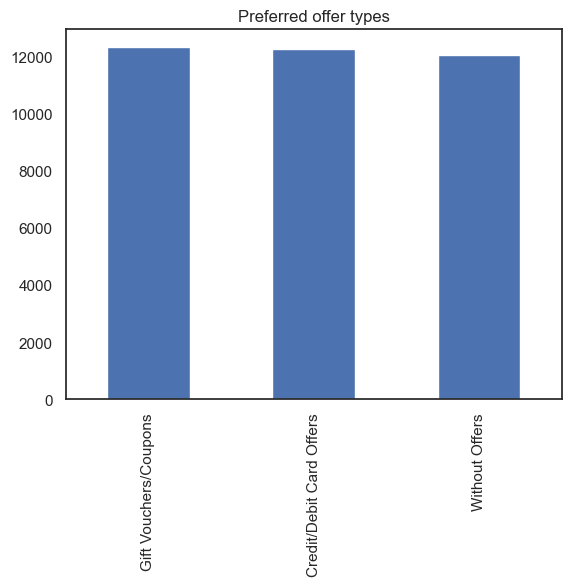

In [517]:
df.preferred_offer_types.value_counts().plot(kind = 'bar', title = 'Preferred offer types')

In [193]:
df.medium_of_operation.value_counts()
df['medium_of_operation'] = df.medium_of_operation.map(lambda x: 'Unknown' if x == '?' else x)

In [194]:
df.internet_option.value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [195]:
# the last visit time is only time during the day, there is no date information
df.last_visit_time.value_counts()

07:56:41    6
17:11:53    5
22:31:06    5
02:50:54    5
12:30:02    5
           ..
21:48:50    1
07:53:40    1
00:05:51    1
10:48:11    1
01:39:52    1
Name: last_visit_time, Length: 30101, dtype: int64

<AxesSubplot: title={'center': 'The number of login at each time point during the day'}>

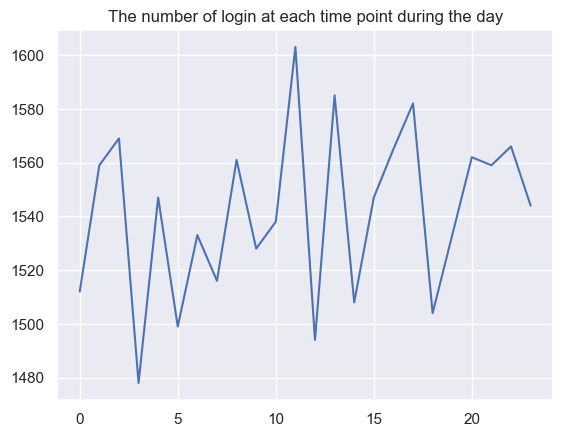

In [196]:
from datetime import datetime
def object2timestamp(x):
    # return time into hour during the day    
    return datetime.strptime(x,'%H:%M:%S').timetuple().tm_hour

last_visit_time = df.last_visit_time.map(object2timestamp)
last_visit_time.value_counts().sort_index().plot(title = 'The number of login at each time point during the day') 

In [197]:
df['last_visit_time'] = last_visit_time

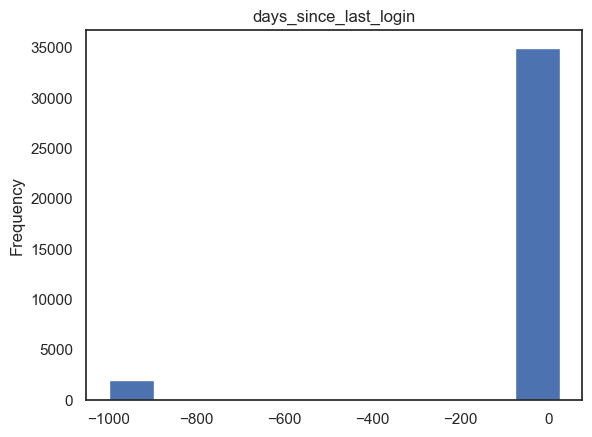

In [521]:
# negative days are wrong, outliers, so we are going to set as NAN, and handle later in modeling (fill with mean)
df.days_since_last_login.plot(kind = 'hist', title = 'days_since_last_login')
df['days_since_last_login'] = df.days_since_last_login.map(lambda x: np.nan if x < 0 else x)

<AxesSubplot: title={'center': 'days_since_last_login'}, ylabel='Frequency'>

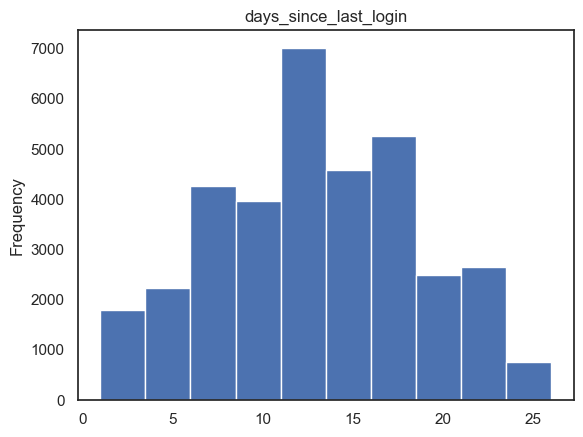

In [522]:
df.days_since_last_login.plot(kind = 'hist', title = 'days_since_last_login')

In [524]:
# simaler as days_since_last_login
df['avg_time_spent'] = df.avg_time_spent.map(lambda x: np.nan if x < 0 else x)

<AxesSubplot: title={'center': 'avg_time_spent'}, ylabel='Frequency'>

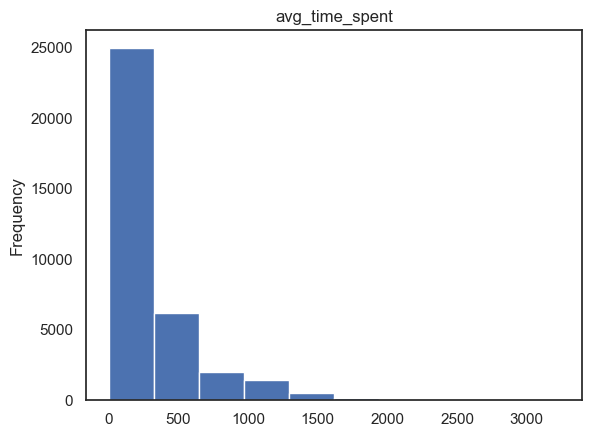

In [525]:
df.avg_time_spent.plot(kind = 'hist', title = 'avg_time_spent')

<AxesSubplot: title={'center': 'avg_transaction_value'}, ylabel='Frequency'>

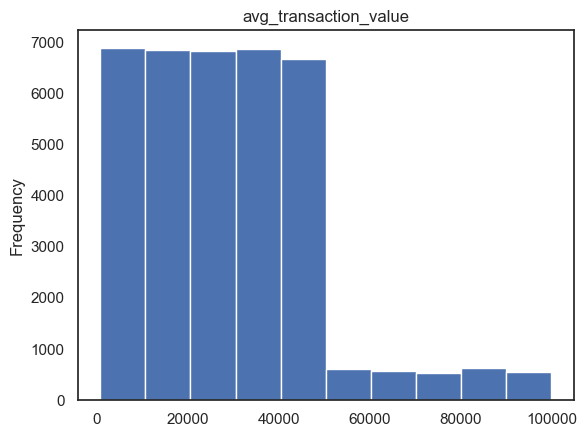

In [526]:
df.avg_transaction_value.plot(kind = 'hist', title = 'avg_transaction_value')

In [528]:
# df.avg_frequency_login_days.value_counts()
# outlier and error were set as NaN to handle later as mean
df['avg_frequency_login_days'] = df.avg_frequency_login_days.map(lambda x: np.nan if x == 'Error' or float(x) < 0 else float(x))

<AxesSubplot: title={'center': 'avg_frequency_login_days'}, ylabel='Frequency'>

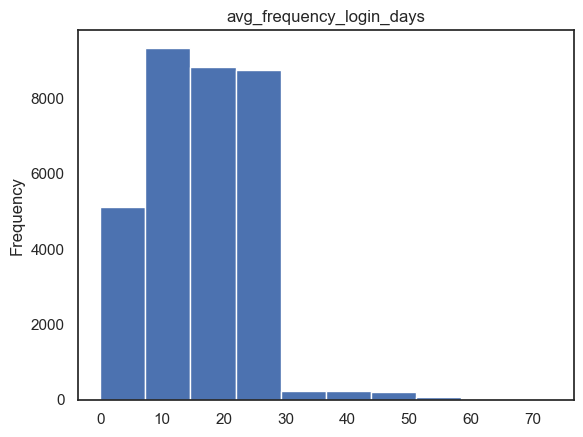

In [529]:
df.avg_frequency_login_days.plot(kind = 'hist', title = 'avg_frequency_login_days')

<AxesSubplot: title={'center': 'points_in_wallet'}, ylabel='Frequency'>

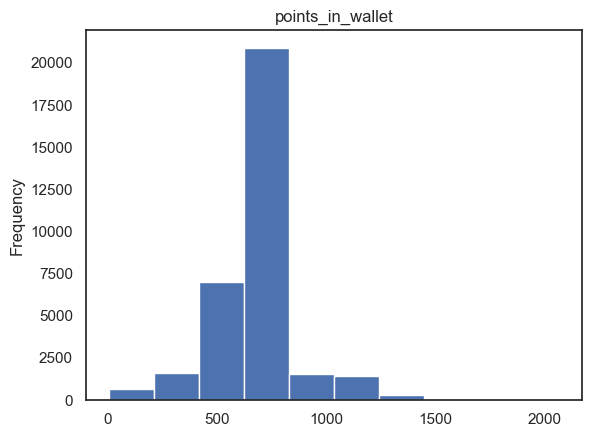

In [532]:
df['points_in_wallet'] = df.points_in_wallet.map(lambda x: np.nan if x < 0 else x)
df.points_in_wallet.plot(kind = 'hist', title = 'points_in_wallet')

In [206]:
df.used_special_discount.value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [207]:
df.offer_application_preference.value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [208]:
df.past_complaint.value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [209]:
df.complaint_status.value_counts()

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64

In [210]:
df.feedback.value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [211]:
# the churn rate is 54%. It is balance data
df.churn_risk_score.value_counts()[1]/sum(df.churn_risk_score.value_counts())

0.5409818339100346

# Feature engineering

We checked the distribution of each data, and removed outliers when nesscery. Now, we want to each features.

We will need correlation between each pair of feature. Where, we will look the pairplot, and heatmap

Note:

1. Add new features

2. To avvoid test data information leakage, we will split data to be train and test data, and check the colinearity in trianing data. 

3. Correation check can not be handle if there are missing datat. Since there are a missing data in our dataset, we need to impute the missing data. 

4. The pairplot can not handel the str/object, so we need to enconde the catagorical data into interger/float.


In the correlation graph, we can see that 

## New features add into the data

### membership_period_month

In [212]:
from datetime import datetime
from datetime import date

def diff_month(x):
    d1 = date.today()
    d2 = datetime.strptime(x,'%Y-%m-%d')
    return (d1.year - d2.year) * 12 + d1.month - d2.month

df['membership_period_month'] = df.joining_date.map(diff_month)

### Top 10 referral_id: 

'CID43705', 'CID3979', 'CID49601', 'CID15792', 'CID23978', 'CID40797', 'CID49598', 'CID62015', 'CID56219'

In [213]:
df.referral_id.value_counts().head(10)

Unknown     17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
CID23978        9
CID40797        9
CID49598        9
CID62015        9
CID56219        8
Name: referral_id, dtype: int64

In [214]:
# remove the unknow
referral_id_top10 = df.referral_id.value_counts().iloc[1:10]

In [215]:
referral_id_top10

CID43705    12
CID3979     11
CID49601    10
CID15792     9
CID23978     9
CID40797     9
CID49598     9
CID62015     9
CID56219     8
Name: referral_id, dtype: int64

In [216]:
referral_id_top10.index

Index(['CID43705', 'CID3979', 'CID49601', 'CID15792', 'CID23978', 'CID40797',
       'CID49598', 'CID62015', 'CID56219'],
      dtype='object')

In [217]:
# adding new feature 
for i in referral_id_top10.index:
    arr = []
    for j in df.referral_id:
        if j == i:
            arr.append(1)
        else:
            arr.append(0)
    df[i] = arr
 

In [218]:
#df.sum()

### New df with updated features

We looked each features, set outliers as NAN. We wil handle all NAN (old or new) later in the model fiting.

In [219]:
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,membership_period_month,CID43705,CID3979,CID49601,CID15792,CID23978,CID40797,CID49598,CID62015,CID56219
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,Unknown,Gift Vouchers/Coupons,Unknown,...,64,0,0,0,0,0,0,0,0,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,unknown,CID21329,Gift Vouchers/Coupons,Desktop,...,64,0,0,0,0,0,0,0,0,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,73,0,0,0,0,0,0,0,0,0
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,74,0,0,0,0,0,0,0,0,0
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,Unknown,Credit/Debit Card Offers,Smartphone,...,63,0,0,0,0,0,0,0,0,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  int64  
 12  days_since_last_login         34993 non-null  float64
 13  a

In [229]:
# compared with previous df, we can see there are more missing data
# since we handel the outlier bu replace them as np.nan
missing_df(df)

,col_name,missing_val,missing_percentage
3,region_category,5428,14.673443
15,avg_frequency_login_days,4205,11.367323
16,points_in_wallet,3579,9.675065
12,days_since_last_login,1999,5.403871
13,avg_time_spent,1719,4.646951
8,preferred_offer_types,288,0.778547
24,CID43705,0,0.000000
21,feedback,0,0.000000
22,churn_risk_score,0,0.000000
23,membership_period_month,0,0.000000


## Split data

Beyound this point, we split the data to be training and test data set. For feature engineering and modeling.

In [230]:
Target = 'churn_risk_score'
y = df[Target]
X = df.drop([Target], axis=1)

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [232]:
print('Train data shape:', X_train.shape)
print('Test data shape:',X_test.shape)

Train data shape: (25894, 32)
Test data shape: (11098, 32)


##  Catagorical features and numerical feature

We find the list of numerical data and catagorical data

In [233]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

In [234]:
numerical_columns

['age',
 'last_visit_time',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'membership_period_month',
 'CID43705',
 'CID3979',
 'CID49601',
 'CID15792',
 'CID23978',
 'CID40797',
 'CID49598',
 'CID62015',
 'CID56219']

In [235]:
categorical_columns

['gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [236]:
categorical_columns = set(categorical_columns) - {'security_no', 'joining_date', 'referral_id'}

In [237]:
categorical_columns

{'complaint_status',
 'feedback',
 'gender',
 'internet_option',
 'joined_through_referral',
 'medium_of_operation',
 'membership_category',
 'offer_application_preference',
 'past_complaint',
 'preferred_offer_types',
 'region_category',
 'used_special_discount'}

## Transform the Traning data

In order to handle the data well using the python algorithm, we need to build a transform pipeline: 1) imputer missing data 2) encode the catagorical data. 

In [238]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# ct = ColumnTransformer(
#         [("num", imp_mean, list(numerical_columns)),
#          ("cat", imp_most_freq, list(categorical_columns))])
# ct_fit = ct.fit(X_train)
# X_train = pd.DataFrame(ct_fit.transform(X_train))


numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("encode", OrdinalEncoder())]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(numerical_columns)),
        ("cat", categorical_transformer, list(categorical_columns)),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

clf_fit = clf.fit(X_train)
X_train_tranformed = pd.DataFrame(clf_fit.transform(X_train))

In [239]:
clf_fit.get_feature_names_out()

array(['num__age', 'num__last_visit_time', 'num__days_since_last_login',
       'num__avg_time_spent', 'num__avg_transaction_value',
       'num__avg_frequency_login_days', 'num__points_in_wallet',
       'num__membership_period_month', 'num__CID43705', 'num__CID3979',
       'num__CID49601', 'num__CID15792', 'num__CID23978', 'num__CID40797',
       'num__CID49598', 'num__CID62015', 'num__CID56219',
       'cat__region_category', 'cat__gender',
       'cat__used_special_discount', 'cat__past_complaint',
       'cat__offer_application_preference',
       'cat__joined_through_referral', 'cat__complaint_status',
       'cat__internet_option', 'cat__membership_category',
       'cat__medium_of_operation', 'cat__preferred_offer_types',
       'cat__feedback'], dtype=object)

In [240]:
X_train_tranformed.columns = clf_fit.get_feature_names_out()

In [241]:
X_train_tranformed

,num__age,num__last_visit_time,num__days_since_last_login,num__avg_time_spent,num__avg_transaction_value,num__avg_frequency_login_days,num__points_in_wallet,num__membership_period_month,num__CID43705,num__CID3979,...,cat__used_special_discount,cat__past_complaint,cat__offer_application_preference,cat__joined_through_referral,cat__complaint_status,cat__internet_option,cat__membership_category,cat__medium_of_operation,cat__preferred_offer_types,cat__feedback
0,-0.254931,-0.501223,0.592187,2.423655,-0.713003,0.698904,-0.264617,1.211055,-0.018646,-0.015224,...,1.0,1.0,0.0,2.0,2.0,2.0,5.0,2.0,0.0,7.0
1,0.941473,-1.652885,0.960764,-0.725496,-0.411277,-1.333051,-0.753665,-1.186587,-0.018646,-0.015224,...,1.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0
2,-0.191963,-1.364969,1.329342,-0.539502,0.596728,-0.190076,-0.742838,1.690583,-0.018646,-0.015224,...,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0
3,-1.010556,-0.645180,2.066496,-0.379211,-0.230455,1.587884,0.508143,1.019243,-0.018646,-0.015224,...,1.0,1.0,0.0,2.0,0.0,2.0,3.0,2.0,2.0,7.0
4,-0.695712,0.362524,-1.434987,2.340637,0.622152,-0.063079,0.204346,-1.474304,-0.018646,-0.015224,...,1.0,1.0,0.0,0.0,4.0,1.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25889,0.626630,1.370228,0.592187,-0.234173,-0.008978,0.063918,1.499056,-1.666116,-0.018646,-0.015224,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0
25890,-0.443837,-1.077054,0.407899,1.720234,0.189845,-0.063079,-0.591753,-0.707059,-0.018646,-0.015224,...,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
25891,-0.821650,-0.357265,0.223610,3.546445,0.979648,-0.063079,0.189760,0.347903,-0.018646,-0.015224,...,1.0,0.0,0.0,0.0,1.0,0.0,5.0,3.0,2.0,2.0
25892,-0.191963,0.218566,2.066496,0.160106,-0.083319,0.063918,-0.021523,-0.227531,-0.018646,-0.015224,...,1.0,1.0,0.0,1.0,4.0,0.0,0.0,2.0,2.0,7.0


## Pairplot

In [242]:
# # remove comment to run
# import seaborn as sns
# sns.pairplot(X_train_tranformed.sample(n=100), corner = True)

## Heatmap


<AxesSubplot: >

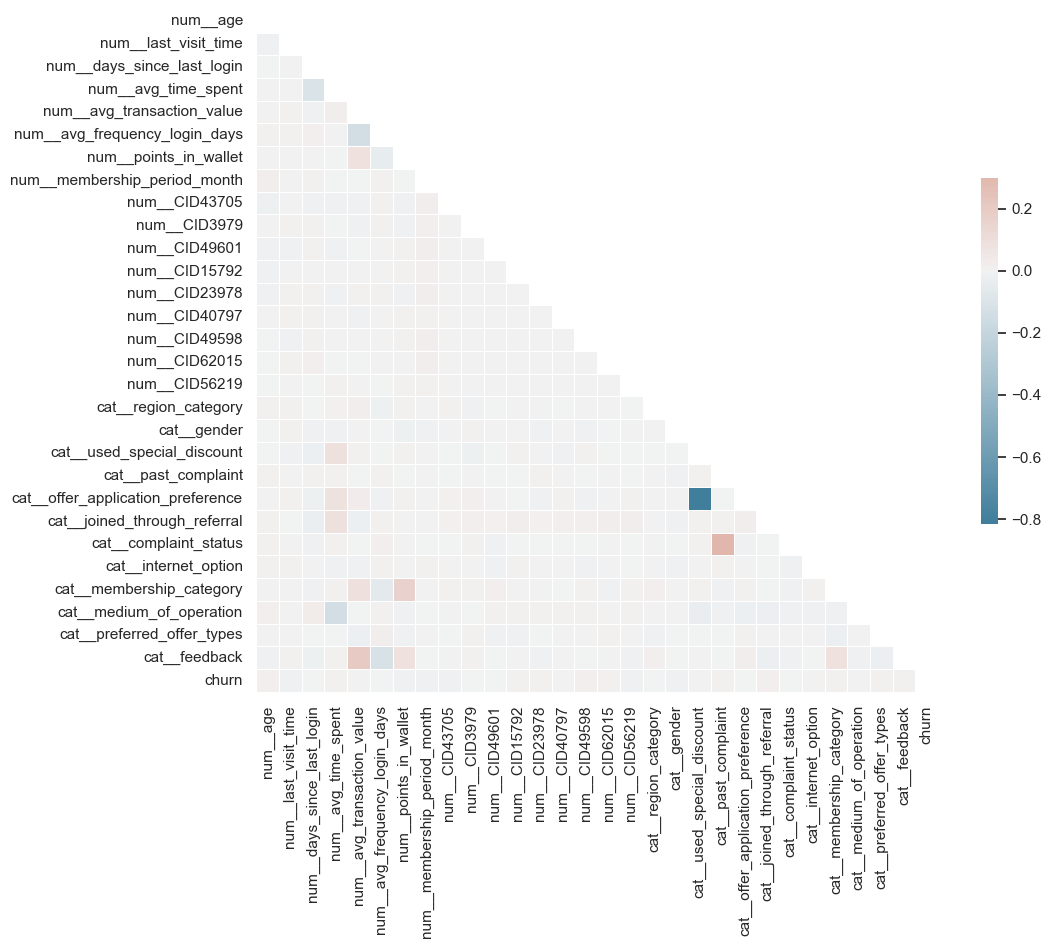

In [243]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = X_train_tranformed
d['churn'] = y_train

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [244]:
corr.style.background_gradient(cmap='coolwarm')

,num__age,num__last_visit_time,num__days_since_last_login,num__avg_time_spent,num__avg_transaction_value,num__avg_frequency_login_days,num__points_in_wallet,num__membership_period_month,num__CID43705,num__CID3979,num__CID49601,num__CID15792,num__CID23978,num__CID40797,num__CID49598,num__CID62015,num__CID56219,cat__region_category,cat__gender,cat__used_special_discount,cat__past_complaint,cat__offer_application_preference,cat__joined_through_referral,cat__complaint_status,cat__internet_option,cat__membership_category,cat__medium_of_operation,cat__preferred_offer_types,cat__feedback,churn
num__age,1.000000,-0.010375,-0.003553,-0.000964,0.000041,0.003680,0.002170,0.017007,-0.014799,0.002350,-0.006168,-0.005375,-0.010432,-0.000526,-0.003840,-0.003896,-0.004044,0.006353,-0.003230,-0.005256,0.004503,0.002152,0.006342,0.008109,0.007509,0.003000,0.014681,0.000549,-0.006083,0.015830
num__last_visit_time,-0.010375,1.000000,-0.000732,0.002511,0.005433,0.010953,-0.000305,0.000003,0.001093,0.005154,-0.006966,0.002918,0.005108,0.004058,-0.007855,0.011710,0.000212,0.006096,0.004632,-0.007773,0.001147,0.007549,-0.001731,-0.000148,0.003633,0.001559,0.000273,-0.000741,0.007007,-0.010699
num__days_since_last_login,-0.003553,-0.000732,1.000000,-0.103282,-0.011988,0.014793,-0.000104,0.005146,-0.006139,0.005742,0.008230,0.002378,0.008791,0.003872,0.007988,0.012768,-0.004116,-0.001474,-0.007622,-0.023162,0.005000,-0.016058,-0.028031,-0.006089,0.000545,-0.010009,0.031544,-0.003781,-0.014187,-0.002225
num__avg_time_spent,-0.000964,0.002511,-0.103282,1.000000,0.017072,0.003278,-0.001504,-0.002283,-0.008121,-0.003421,-0.009915,0.001399,-0.005899,-0.000464,0.003370,-0.001640,0.004984,0.011772,-0.007894,0.088408,0.004351,0.077630,0.094948,0.007649,-0.008460,0.005070,-0.136905,-0.004761,0.008076,0.005265
num__avg_transaction_value,0.000041,0.005433,-0.011988,0.017072,1.000000,-0.139193,0.085704,-0.002380,-0.009992,-0.006011,-0.003324,0.003084,0.010383,-0.010314,0.000321,-0.001070,0.000733,0.022222,0.001466,0.003910,-0.004571,0.026590,-0.021727,-0.004724,-0.005342,0.094079,-0.002254,-0.021422,0.206362,-0.000258
num__avg_frequency_login_days,0.003680,0.010953,0.014793,0.003278,-0.139193,1.000000,-0.042525,0.004166,0.008033,0.004195,0.001947,0.002543,0.006863,-0.000638,0.003297,0.001349,-0.003844,-0.014863,-0.003719,-0.001358,0.008901,-0.010664,0.008572,0.013087,0.003494,-0.058411,0.004212,0.016946,-0.118355,-0.001442
num__points_in_wallet,0.002170,-0.000305,-0.000104,-0.001504,0.085704,-0.042525,1.000000,-0.003353,-0.008893,-0.006826,0.009186,0.012034,-0.005518,0.005254,0.007399,0.002281,0.008441,0.006486,-0.015411,0.005303,-0.001924,0.004263,0.001399,-0.000249,0.001853,0.162310,-0.007013,-0.007622,0.084880,-0.005527
num__membership_period_month,0.017007,0.000003,0.005146,-0.002283,-0.002380,0.004166,-0.003353,1.000000,0.020794,0.015030,0.018963,0.012255,0.020658,0.007730,0.023377,0.017436,0.004594,0.000068,-0.006071,-0.000455,0.001355,-0.000194,0.000928,-0.001260,0.005269,0.001898,-0.001112,-0.000064,-0.004977,-0.013481
num__CID43705,-0.014799,0.001093,-0.006139,-0.008121,-0.009992,0.008033,-0.008893,0.020794,1.000000,-0.000284,-0.000259,-0.000307,-0.000328,-0.000284,-0.000348,-0.000307,-0.000307,0.009484,0.001908,-0.003877,-0.002003,0.004264,0.010431,-0.002748,0.002465,0.004591,-0.000184,-0.004725,-0.000612,-0.010004
num__CID3979,0.002350,0.005154,0.005742,-0.003421,-0.006011,0.004195,-0.006826,0.015030,-0.000284,1.000000,-0.000212,-0.000250,-0.000268,-0.000232,-0.000284,-0.000250,-0.000250,-0.010506,0.004918,-0.016760,0.000056,0.013688,0.013321,0.004705,-0.000059,0.005212,-0.001132,0.009610,0.003456,-0.004648


## Feature to drop: 'offer_application_preference'

From the correlation plot, we can see that 'offer_application_preference' and 'used_special_discount' are very related (corr = 0.81), we may drop either one, we will drop 'offer_application_preference' here.

Complain status and past complain are also related (corr = 0.5), but not highly correlated, so we will keep both.

In [245]:
categorical_columns = set(categorical_columns) - {'offer_application_preference'}

In [246]:
categorical_columns

{'complaint_status',
 'feedback',
 'gender',
 'internet_option',
 'joined_through_referral',
 'medium_of_operation',
 'membership_category',
 'past_complaint',
 'preferred_offer_types',
 'region_category',
 'used_special_discount'}

# Business insight

For this section, before we dive into the modeling, we want to get some business insight from the distribution of the each feature along the churn risk score.

## The numerical distribution in churn = 1 and 0

1) From the plot below, we can see that the points_in_wallet might have relation with churn risk low points tend to churn, however, high is not. So we can offer free points to this high churn risk customers. 

2) We can also see the customer with lower avg_transaction_value tend to churn, so we can send promotion/ads to this customers to encourage them to make purchase to increase avg_transaction_value

3) Besides, we can see that the customers with high avg_frequency_login_days tends to churn. We assume they are looking for the something within our story, or spend time with customer service, but there are not satisfied

We can dig deeper into thie feature (like sending survery/questionare) ask about the reason, they are leaving the business


In [57]:
numerical_columns

['age',
 'last_visit_time',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'membership_period_month']

<AxesSubplot: xlabel='churn_risk_score', ylabel='membership_period_month'>

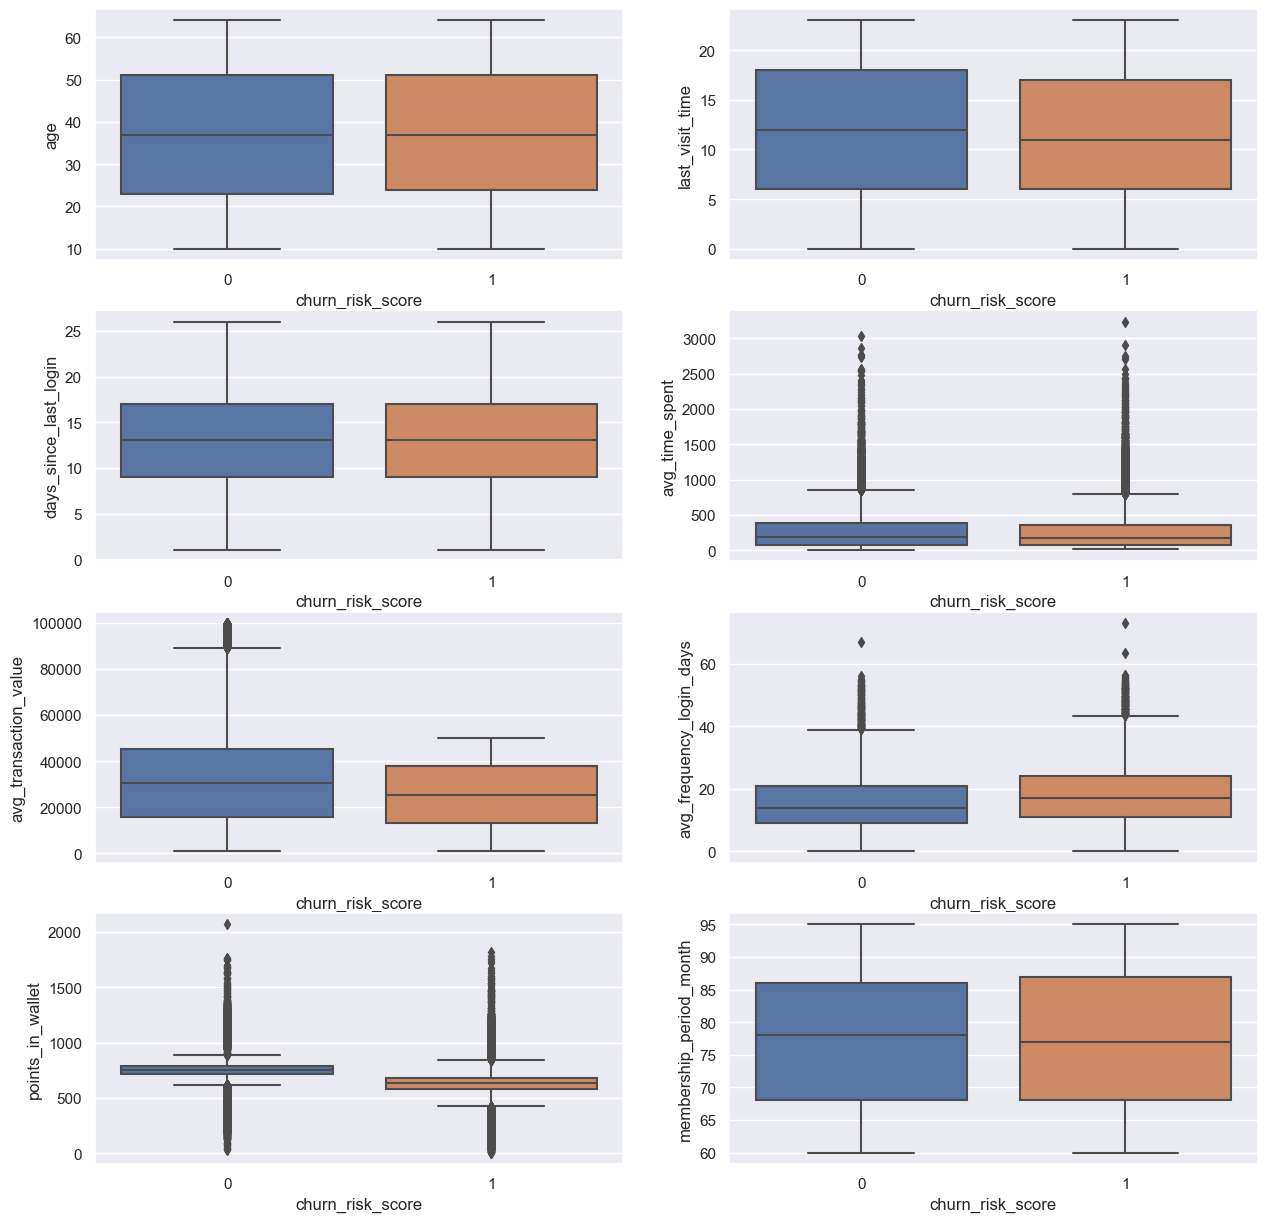

In [58]:
# we can see that the points_in_wallet might have relation with churn risk
# low points tend to churn, well high is not
# so we can offer free points to this high churn risk customers.

# we can also see the customer with lower avg_transaction_value tend to churn, 
# so we can send promotion/ads to this customers to encourage them to make purchase to increase avg_transaction_value

# Besides, we can see that the customers with high avg_frequency_login_days tends to churn
# We assume they are looking for the something within our story, or spend time with customer service, but there are not satisfied
# We can dig deeper into thie feature (like sending survery/questionare) ask about the reason, they are leaving the business

sns.set()
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(data=df, x='churn_risk_score', y='age', ax=axes[0,0])
sns.boxplot(data=df, x='churn_risk_score', y='last_visit_time', ax=axes[0,1])
sns.boxplot(data=df, x='churn_risk_score', y='days_since_last_login', ax=axes[1,0])
sns.boxplot(data=df, x='churn_risk_score', y='avg_time_spent', ax=axes[1,1])
sns.boxplot(data=df, x='churn_risk_score', y='avg_transaction_value', ax=axes[2,0])
sns.boxplot(data=df, x='churn_risk_score', y='avg_frequency_login_days', ax=axes[2,1])
sns.boxplot(data=df, x='churn_risk_score', y='points_in_wallet', ax=axes[3,0])
sns.boxplot(data=df, x='churn_risk_score', y='membership_period_month', ax=axes[3,1])



## Interaction between avg_frequency_login_days and catagorical features

since we are interested what cause the relation between churn and the avg_frequency_login_days, and we bring up the assumption:

1) they are not satisified with our srevice
2) they have trouble to find something in our story


we can look how vavg_frequency_login_days distributed in churn or not along with other features from the plt below, we can see except feedback, in all other features, the avg_frequency_login_days in churn = 1 is always tend to higher than that of churn = 0


In [59]:
categorical_columns

{'complaint_status',
 'feedback',
 'gender',
 'internet_option',
 'joined_through_referral',
 'medium_of_operation',
 'membership_category',
 'offer_application_preference',
 'past_complaint',
 'preferred_offer_types',
 'region_category',
 'used_special_discount'}

<AxesSubplot: xlabel='used_special_discount', ylabel='avg_frequency_login_days'>

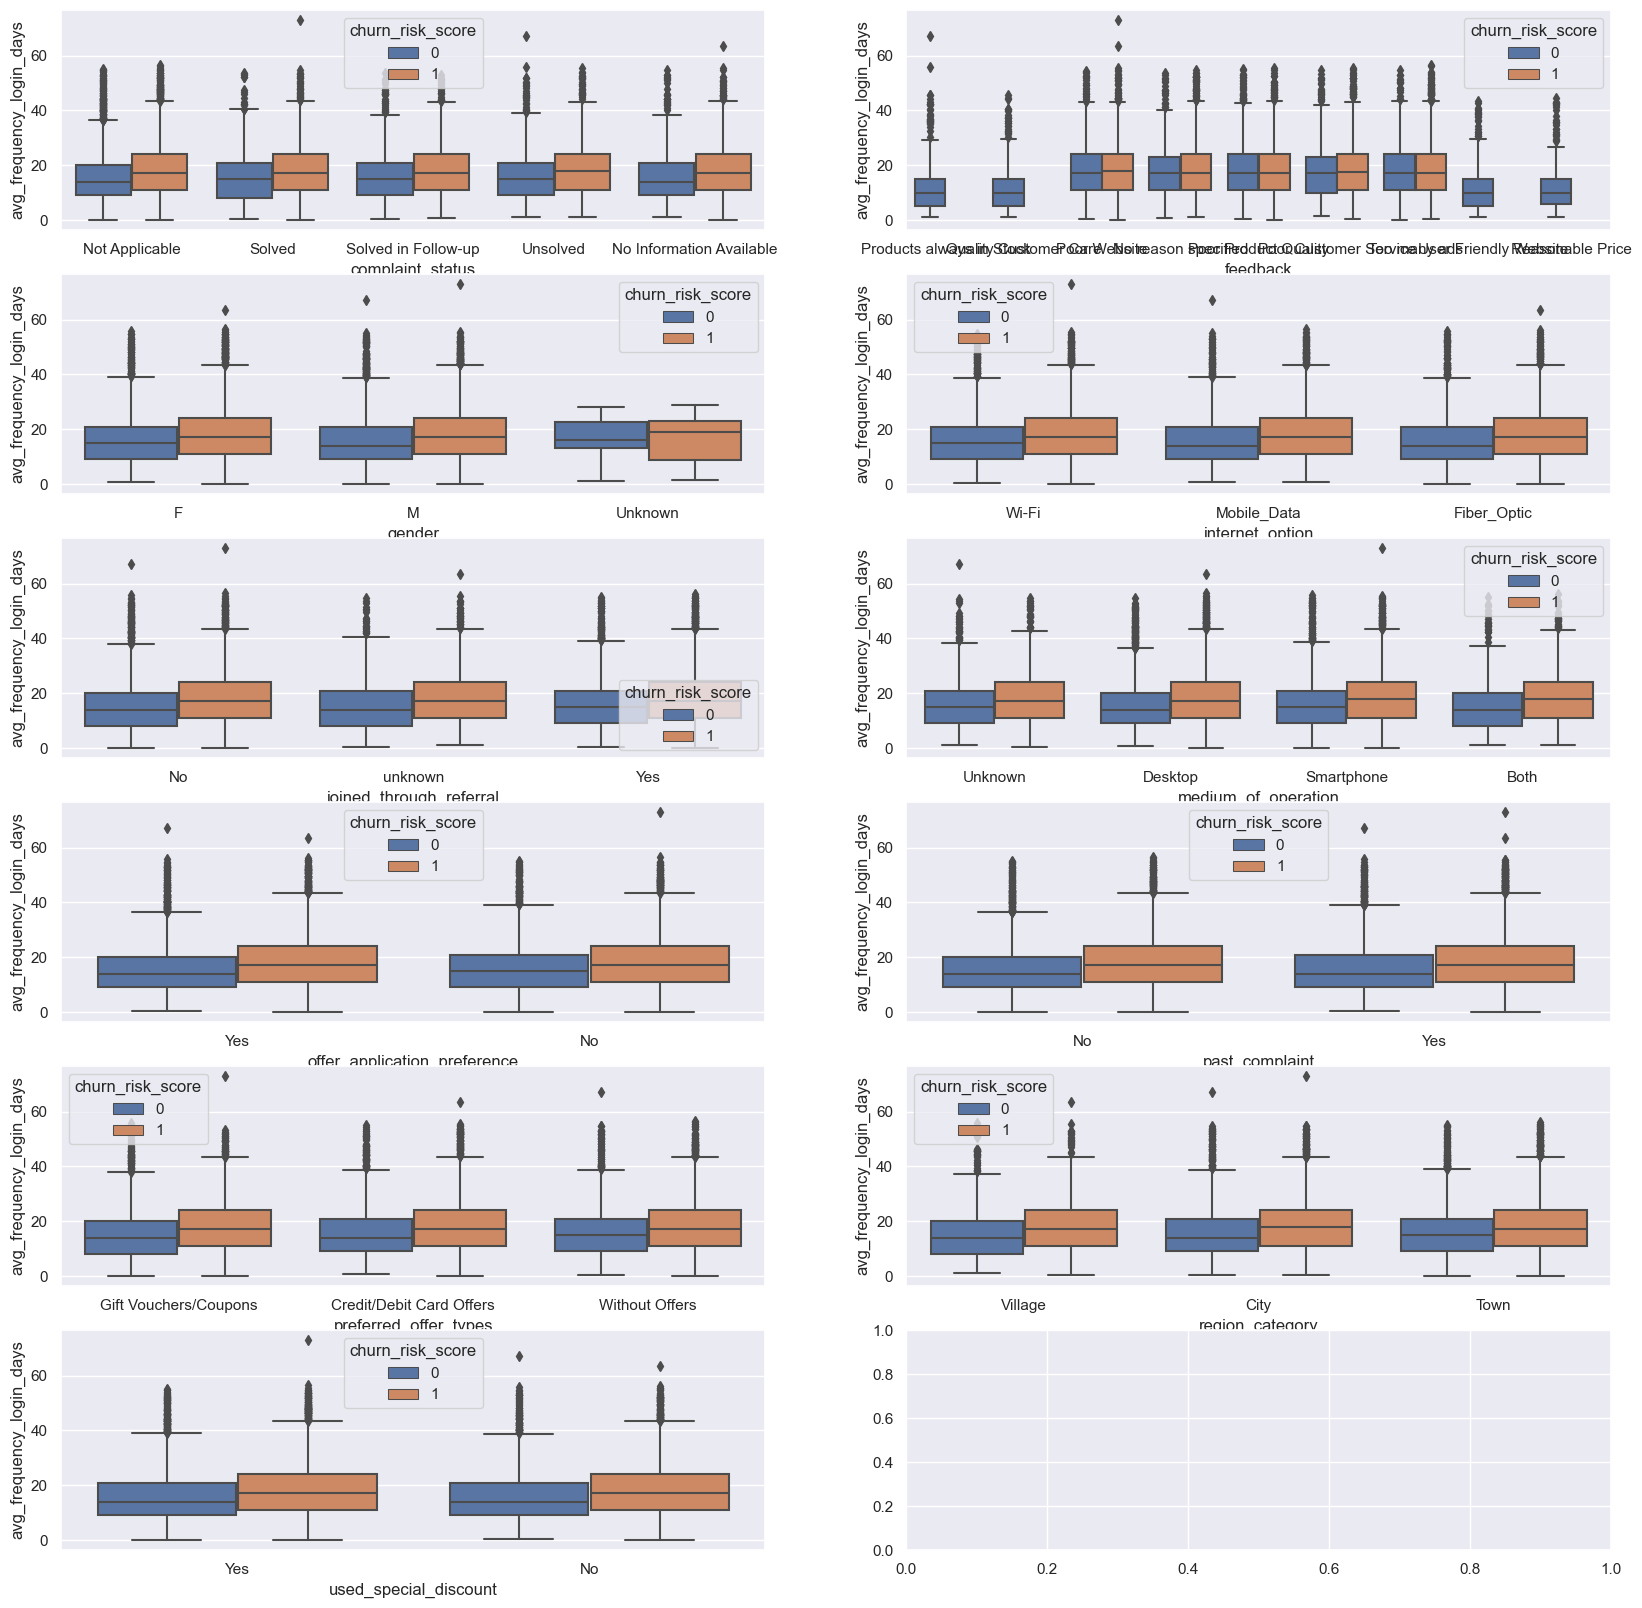

In [60]:
sns.set()
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

sns.boxplot(data=df, x="complaint_status", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[0,0])
sns.boxplot(data=df, x="feedback", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[0,1])
sns.boxplot(data=df, x="gender", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[1,0])
sns.boxplot(data=df, x="internet_option", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[1,1])
sns.boxplot(data=df, x="joined_through_referral", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[2,0])
sns.boxplot(data=df, x="medium_of_operation", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[2,1])
sns.boxplot(data=df, x="offer_application_preference", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[3,0])
sns.boxplot(data=df, x="past_complaint", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[3,1])
sns.boxplot(data=df, x="preferred_offer_types", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[4,0])
sns.boxplot(data=df, x="region_category", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[4,1])
sns.boxplot(data=df, x="used_special_discount", y="avg_frequency_login_days", hue = 'churn_risk_score', ax=axes[5,0])


## Other features

Here, we are going to look the how the effect on the churn from the interactions between other numerical and catagorical features.

In [61]:
# numerical_columns

['age',
 'last_visit_time',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'membership_period_month']

In [62]:
# categorical_columns

{'complaint_status',
 'feedback',
 'gender',
 'internet_option',
 'joined_through_referral',
 'medium_of_operation',
 'membership_category',
 'offer_application_preference',
 'past_complaint',
 'preferred_offer_types',
 'region_category',
 'used_special_discount'}

In [98]:
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="age", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="age", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="age", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="age", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="age", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="age", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="age", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="age", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="age", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="age", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="age", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="age", hue = 'churn_risk_score', ax=axes[5,0])

<AxesSubplot: xlabel='used_special_discount', ylabel='days_since_last_login'>

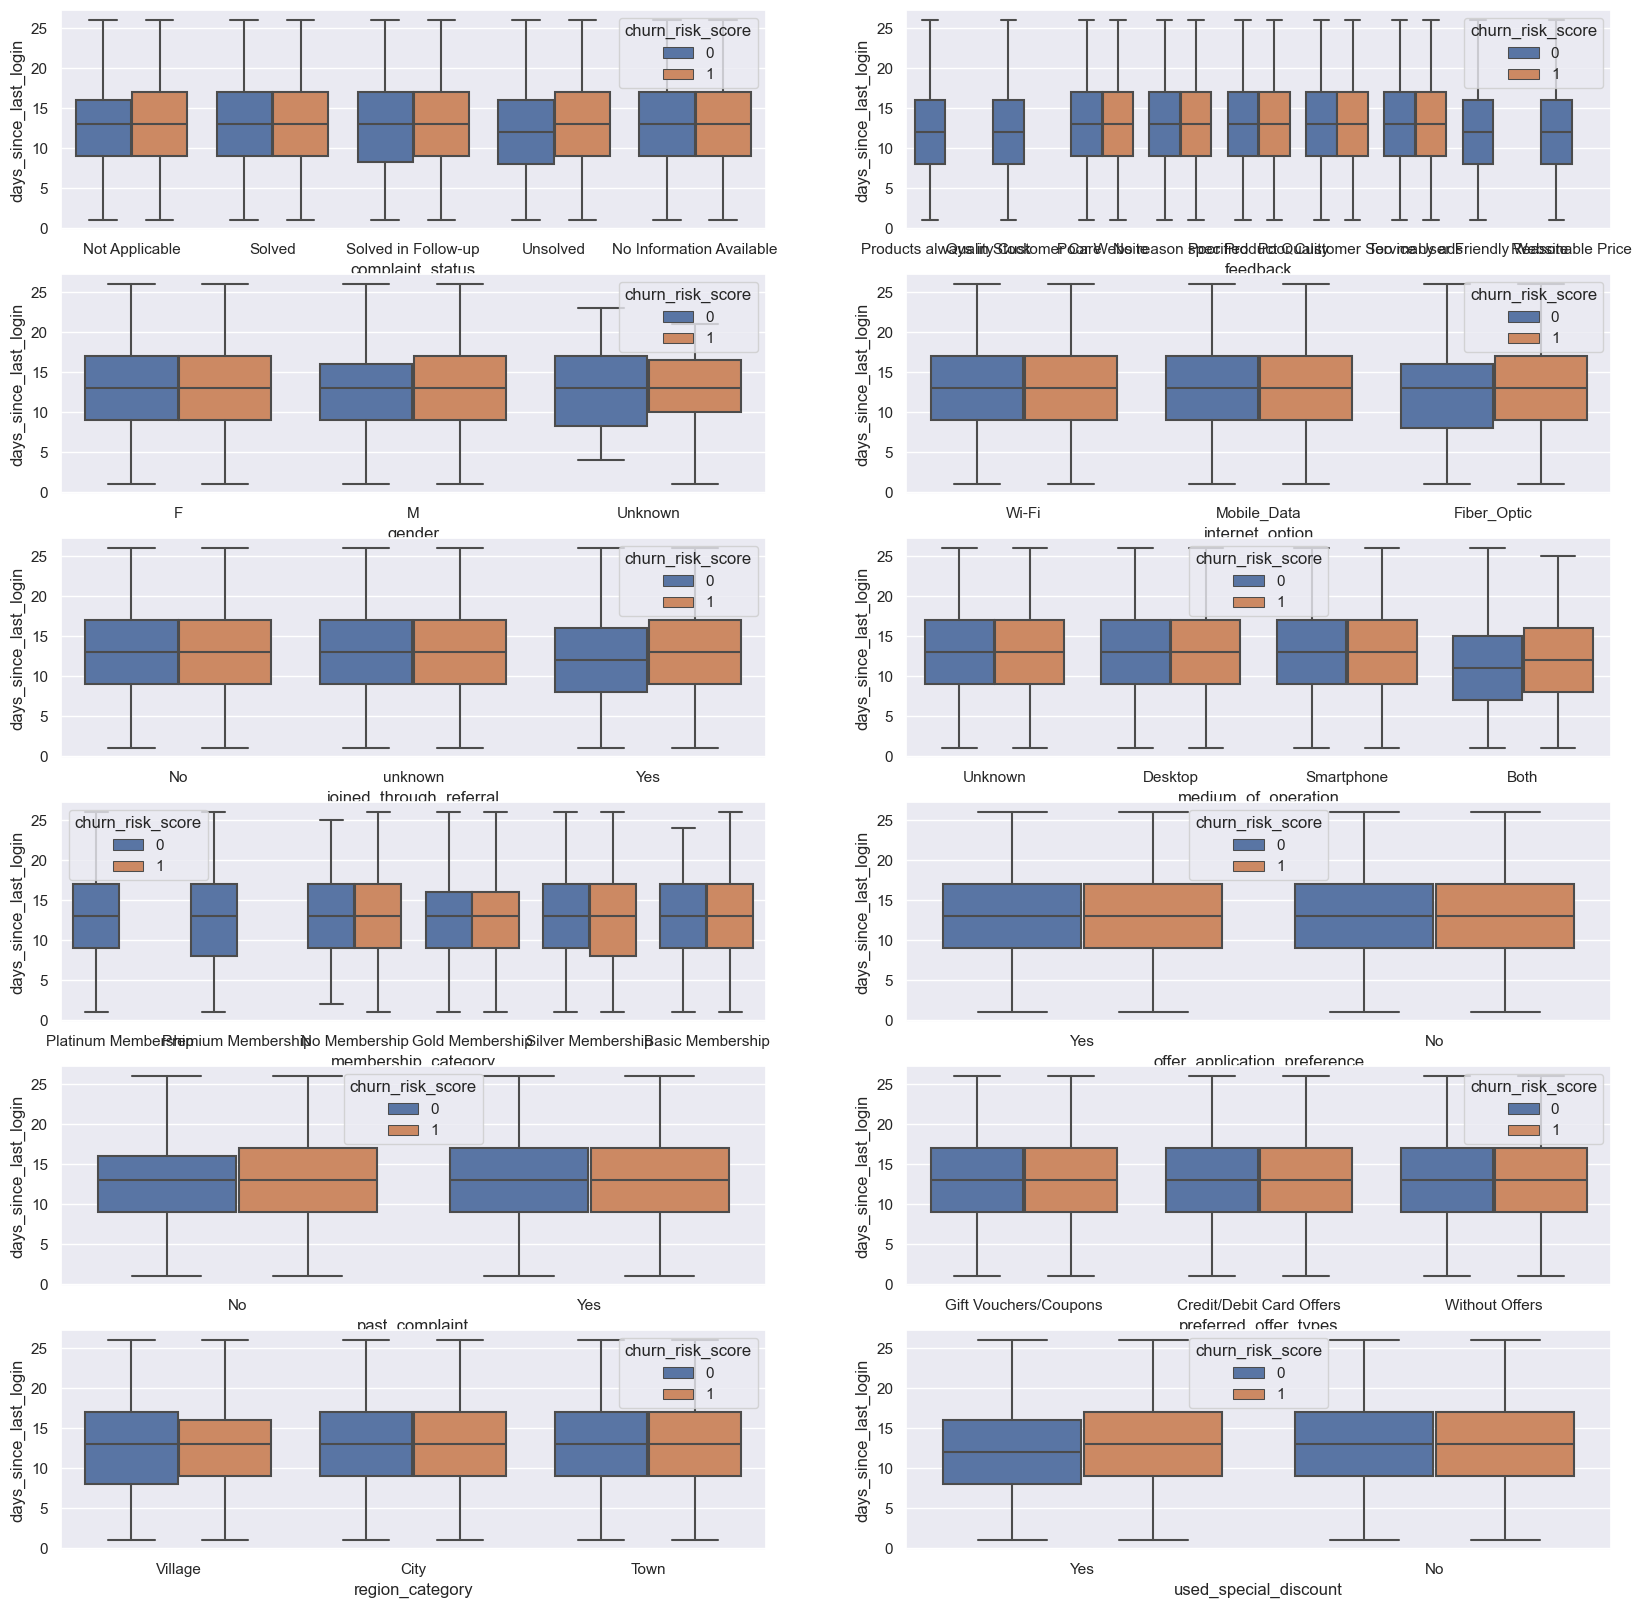

In [64]:
# # for the complaint status = unsolved, churn customer tend to have more days_since_last_login
# # for the used_special_discount = yes, churn customer tend to have more days_since_last_login
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="days_since_last_login", hue = 'churn_risk_score', ax=axes[5,1])

<AxesSubplot: xlabel='used_special_discount', ylabel='avg_time_spent'>

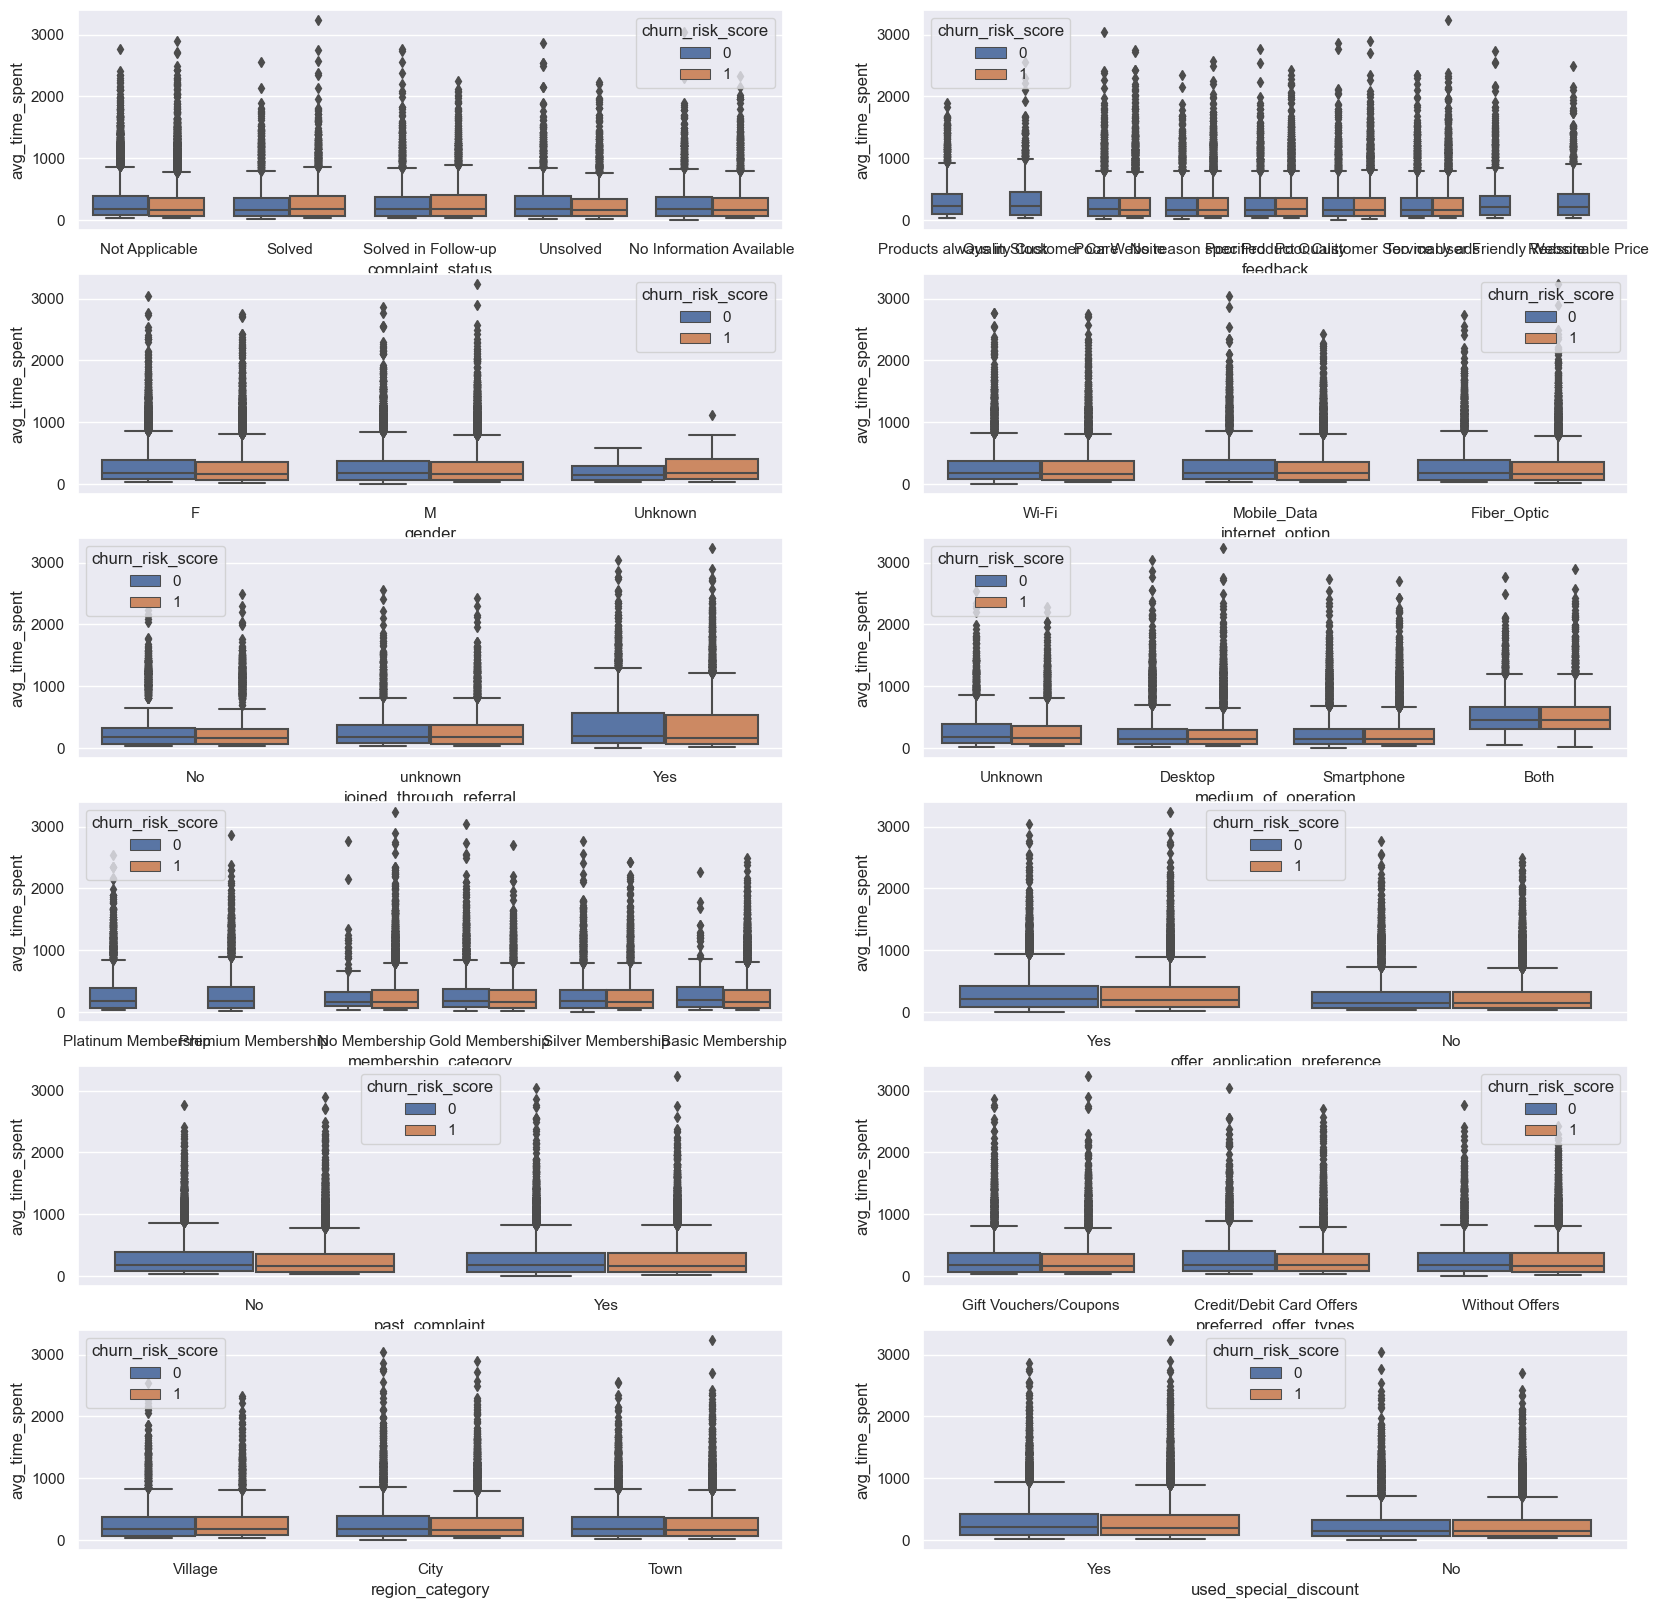

In [65]:
# # nothing special here
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[5,1])

<AxesSubplot: xlabel='used_special_discount', ylabel='avg_transaction_value'>

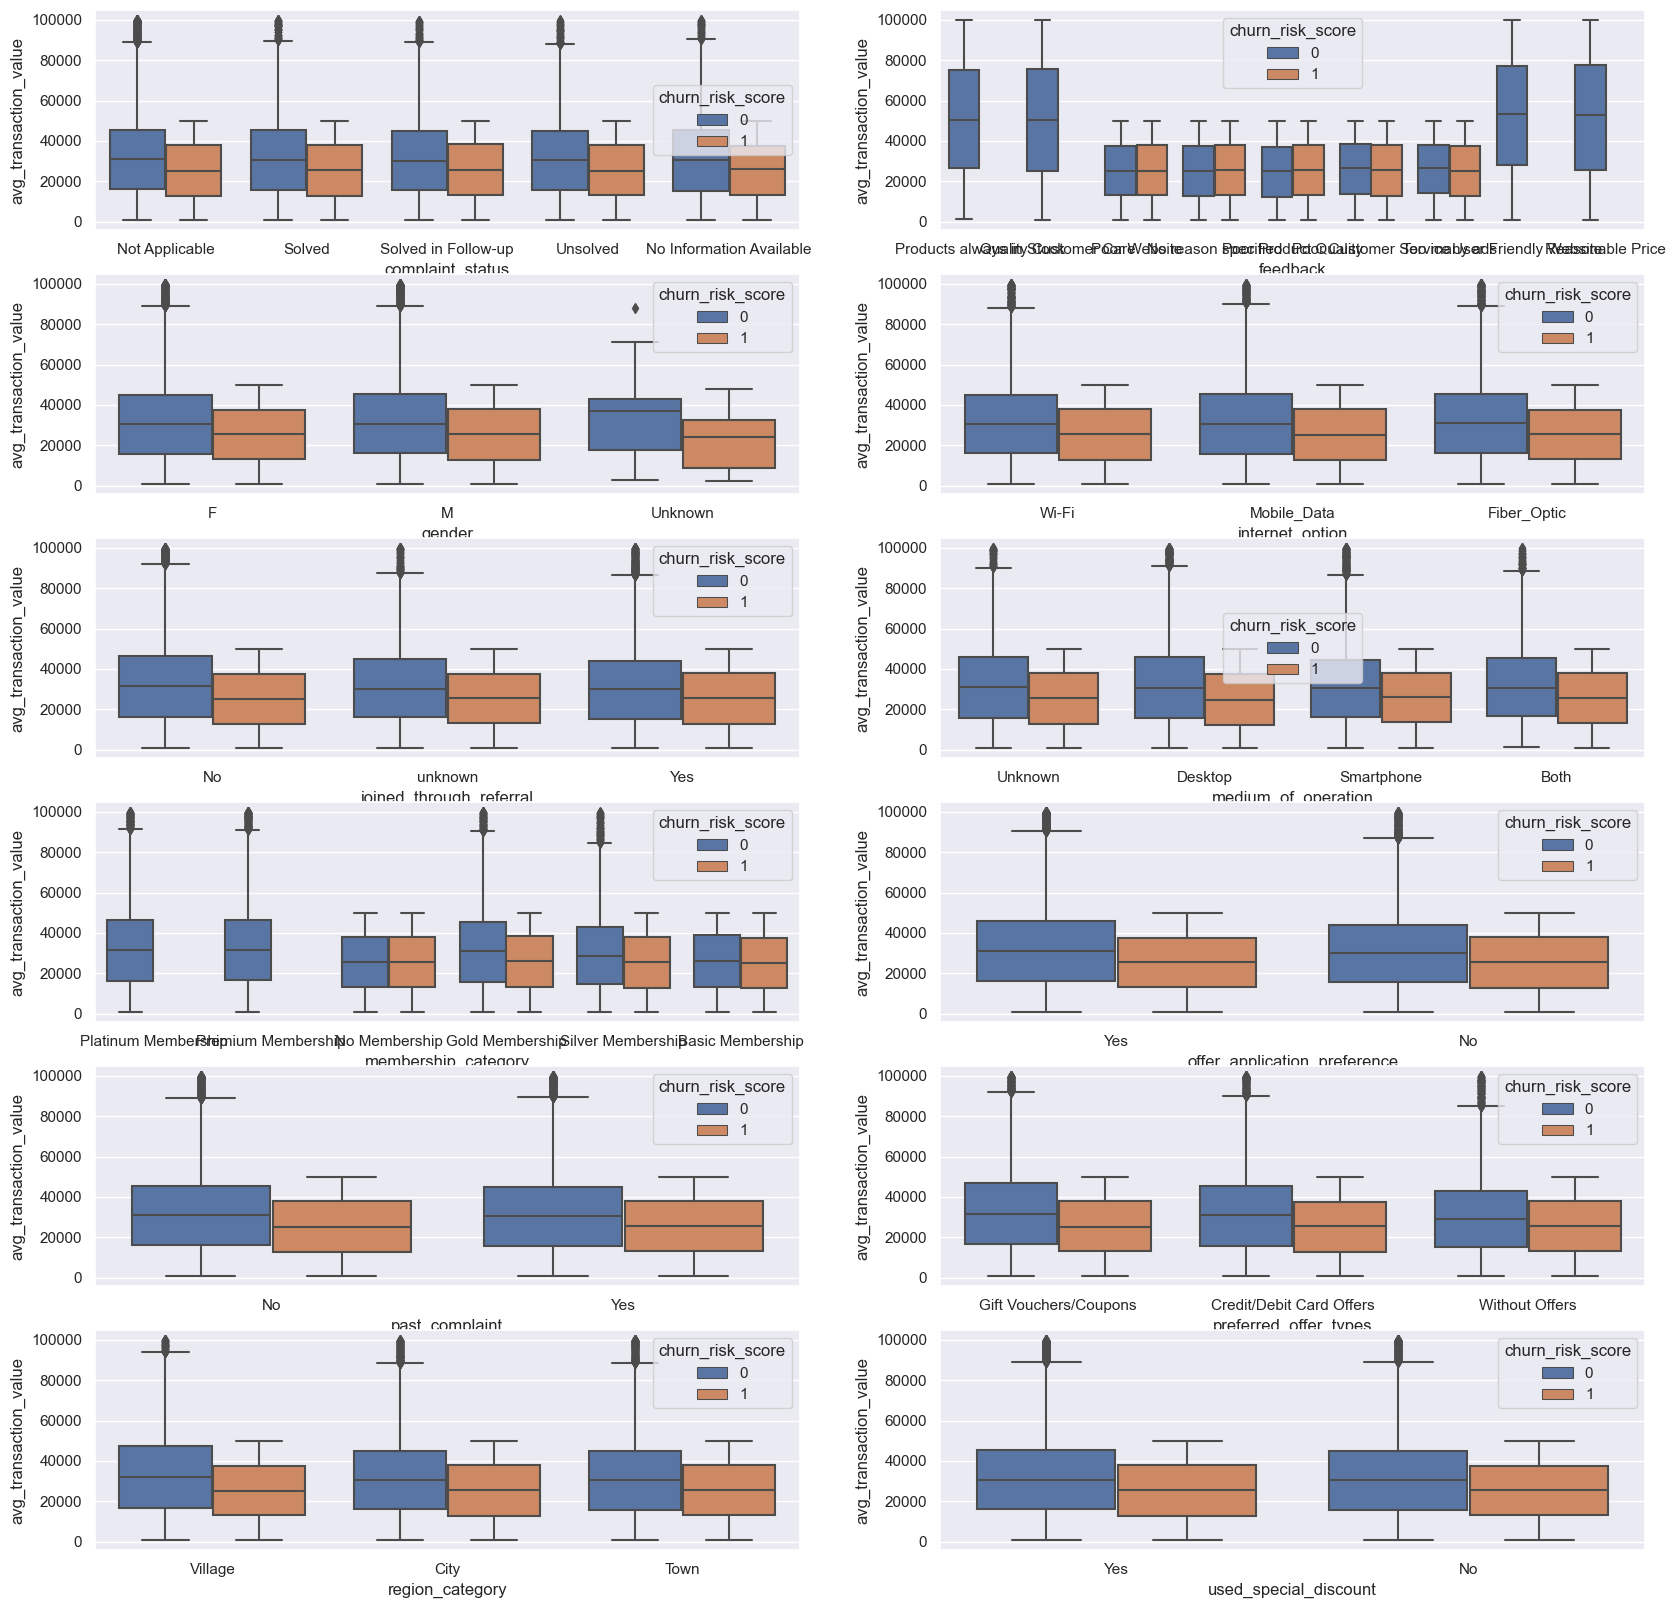

In [66]:
# # nothing epecial
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[5,1])

<AxesSubplot: xlabel='used_special_discount', ylabel='points_in_wallet'>

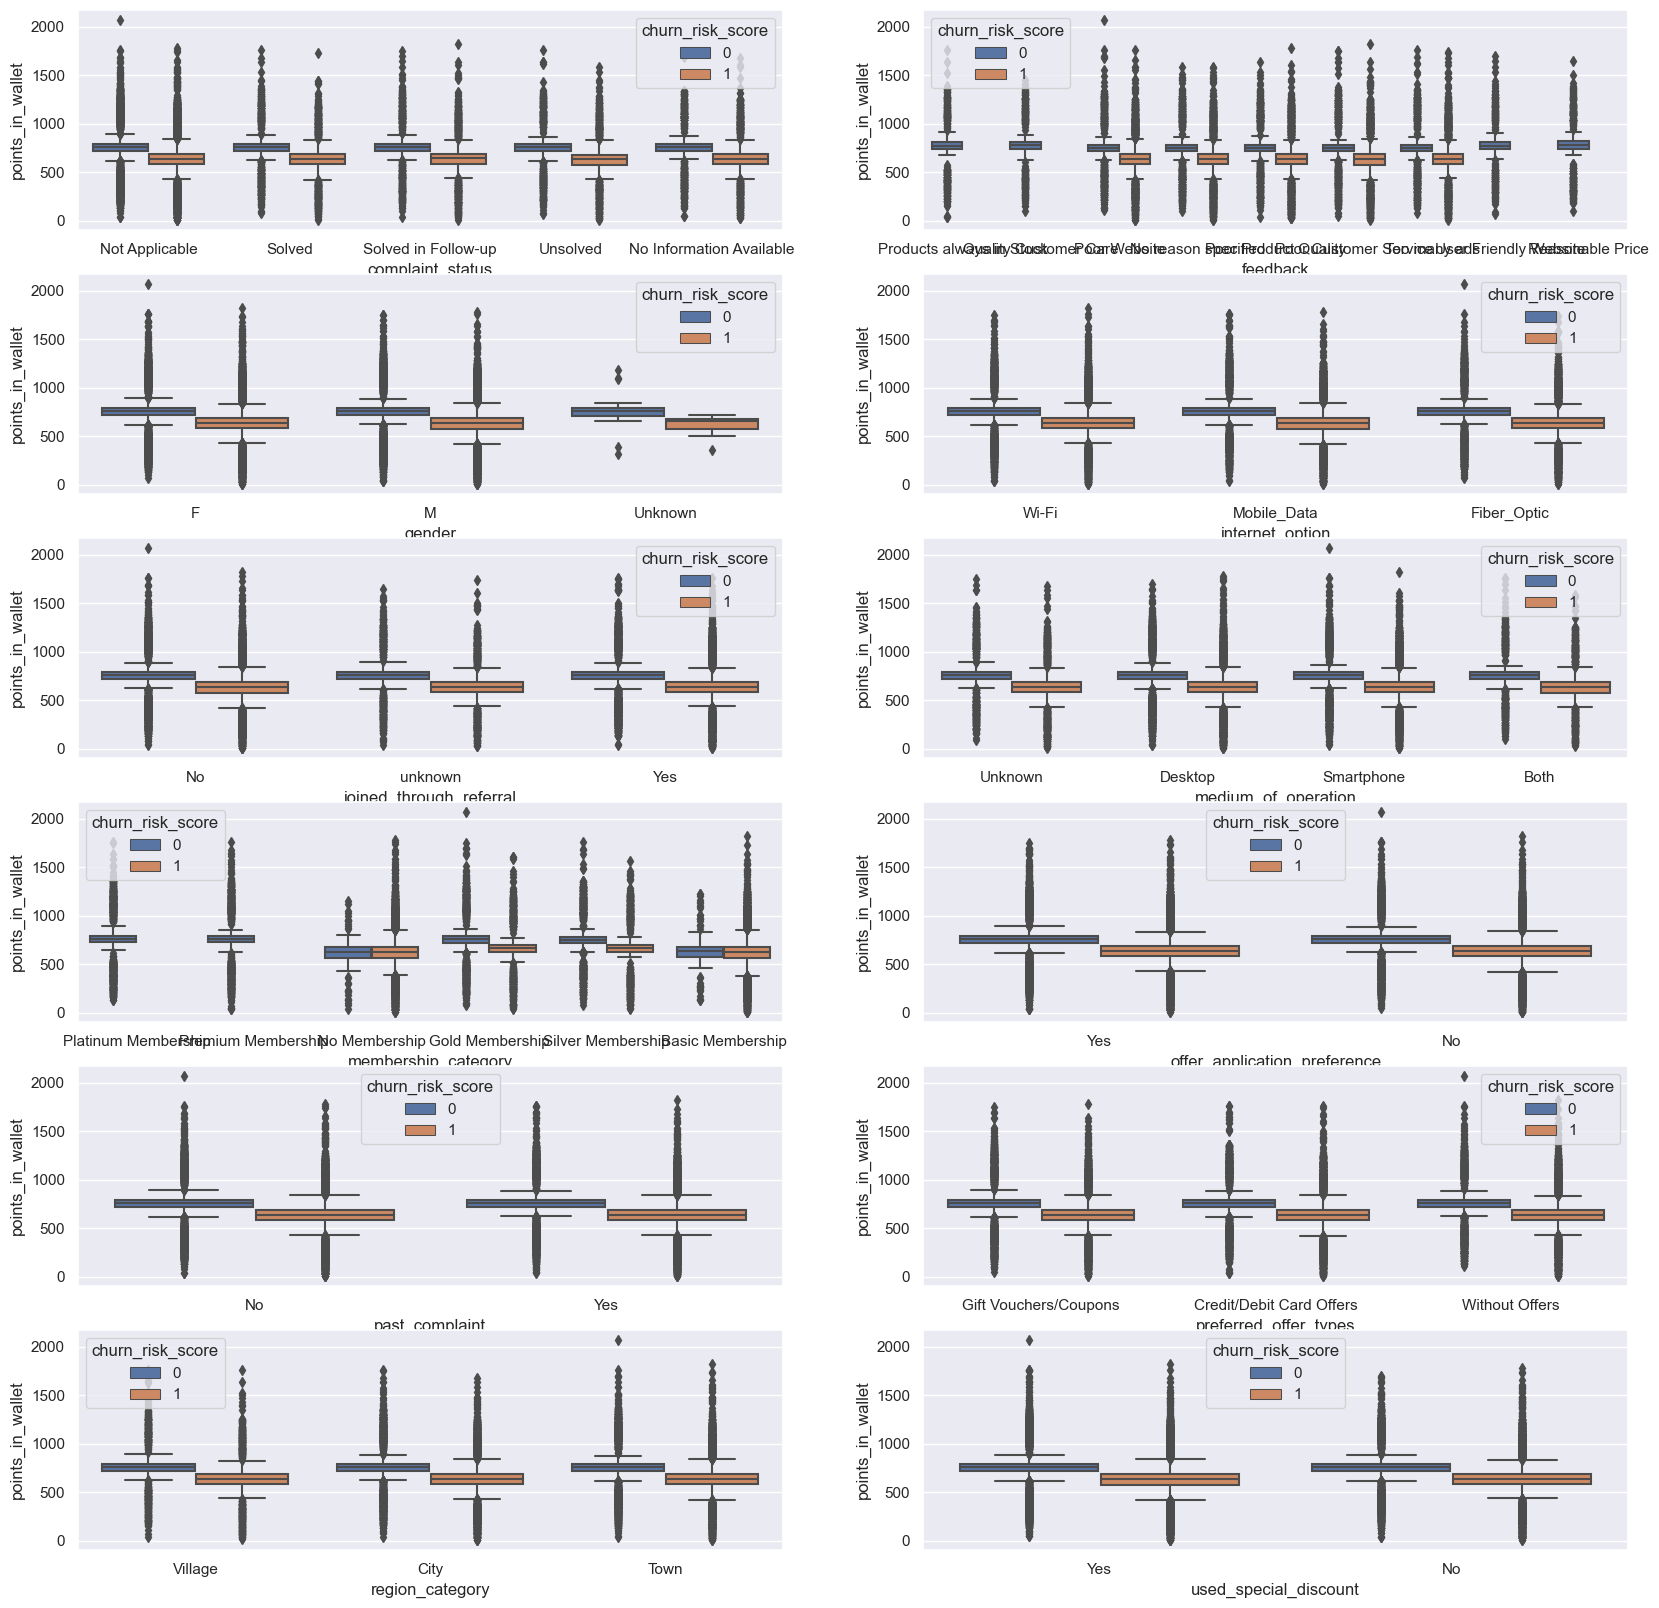

In [67]:
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[5,1])

<AxesSubplot: xlabel='used_special_discount', ylabel='membership_period_month'>

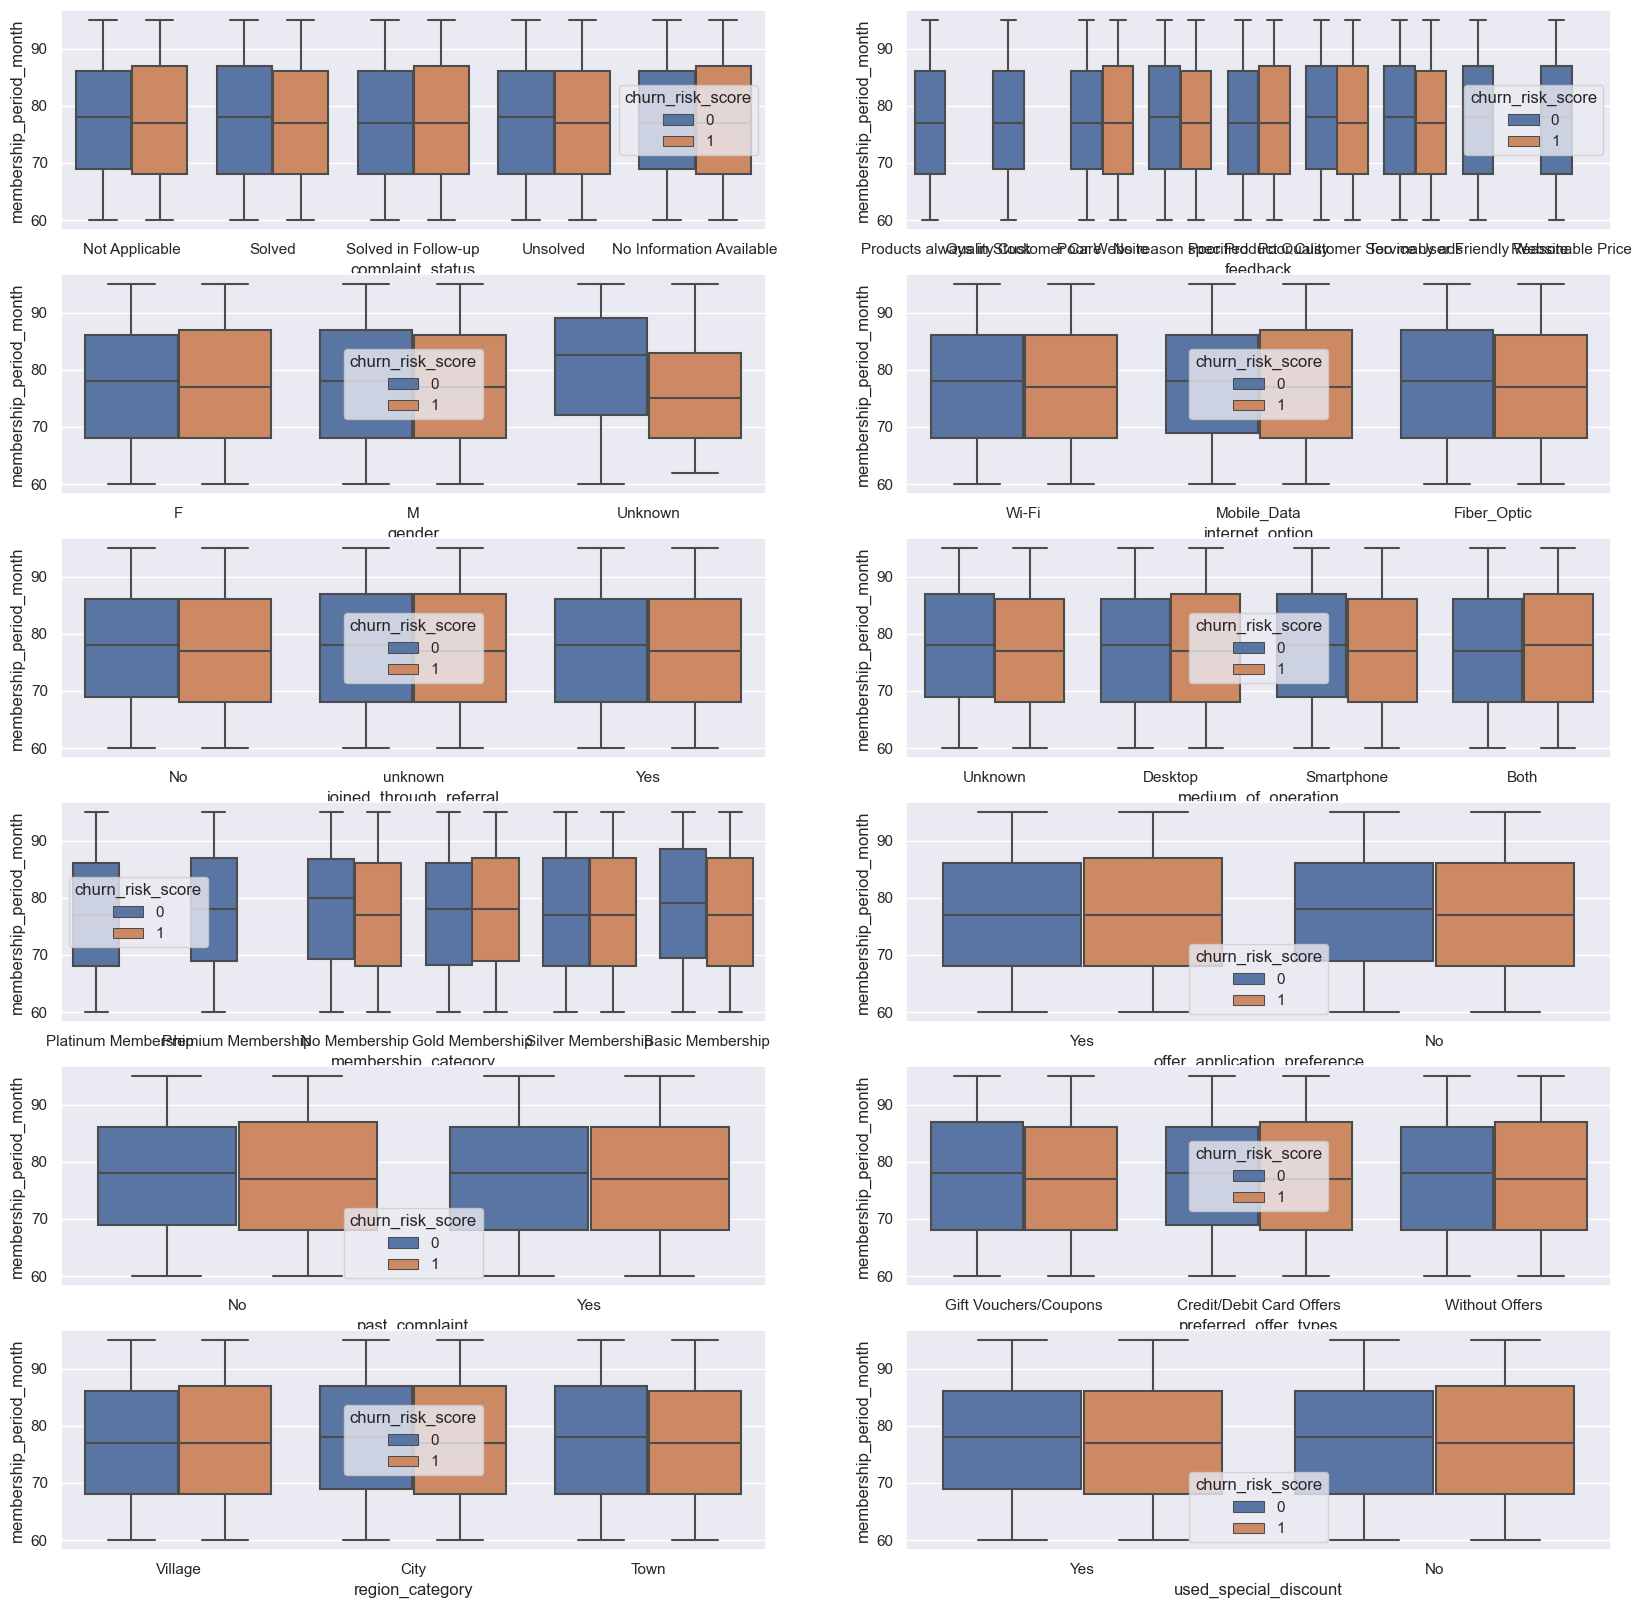

In [68]:
# sns.set()
# fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# sns.boxplot(data=df, x="complaint_status", y="membership_period_month", hue = 'churn_risk_score', ax=axes[0,0])
# sns.boxplot(data=df, x="feedback", y="membership_period_month", hue = 'churn_risk_score', ax=axes[0,1])
# sns.boxplot(data=df, x="gender", y="membership_period_month", hue = 'churn_risk_score', ax=axes[1,0])
# sns.boxplot(data=df, x="internet_option", y="membership_period_month", hue = 'churn_risk_score', ax=axes[1,1])
# sns.boxplot(data=df, x="joined_through_referral", y="membership_period_month", hue = 'churn_risk_score', ax=axes[2,0])
# sns.boxplot(data=df, x="medium_of_operation", y="membership_period_month", hue = 'churn_risk_score', ax=axes[2,1])
# sns.boxplot(data=df, x="membership_category", y="membership_period_month", hue = 'churn_risk_score', ax=axes[3,0])
# sns.boxplot(data=df, x="offer_application_preference", y="membership_period_month", hue = 'churn_risk_score', ax=axes[3,1])
# sns.boxplot(data=df, x="past_complaint", y="membership_period_month", hue = 'churn_risk_score', ax=axes[4,0])
# sns.boxplot(data=df, x="preferred_offer_types", y="membership_period_month", hue = 'churn_risk_score', ax=axes[4,1])
# sns.boxplot(data=df, x="region_category", y="membership_period_month", hue = 'churn_risk_score', ax=axes[5,0])
# sns.boxplot(data=df, x="used_special_discount", y="membership_period_month", hue = 'churn_risk_score', ax=axes[5,1])

## Summary

1) we can see that the points_in_wallet might have relation with churn risk low points tend to churn, well high is not. so we can offer free points to this high churn risk customers.

2) we can also see the customer with lower avg_transaction_value tend to churn, so we can send promotion/ads to this customers to encourage them to make purchase to increase avg_transaction_value

3) Besides, we can see that the customers with high avg_frequency_login_days tends to churn. We assume they are looking for the something within our store, or spend time with customer service, but there are not satisfied. We can dig deeper into thie feature (like sending survery/questionare) ask about the reason, they are leaving the business

4) for the complaint status = unsolved and used_special_discount = yes, customer having more days_since_last_login tend to churn. We can send email to care about these customers.



[Text(0, 0, 'Platinum Membership'),
 Text(1, 0, 'Premium Membership'),
 Text(2, 0, 'No Membership'),
 Text(3, 0, 'Gold Membership'),
 Text(4, 0, 'Silver Membership'),
 Text(5, 0, 'Basic Membership')]

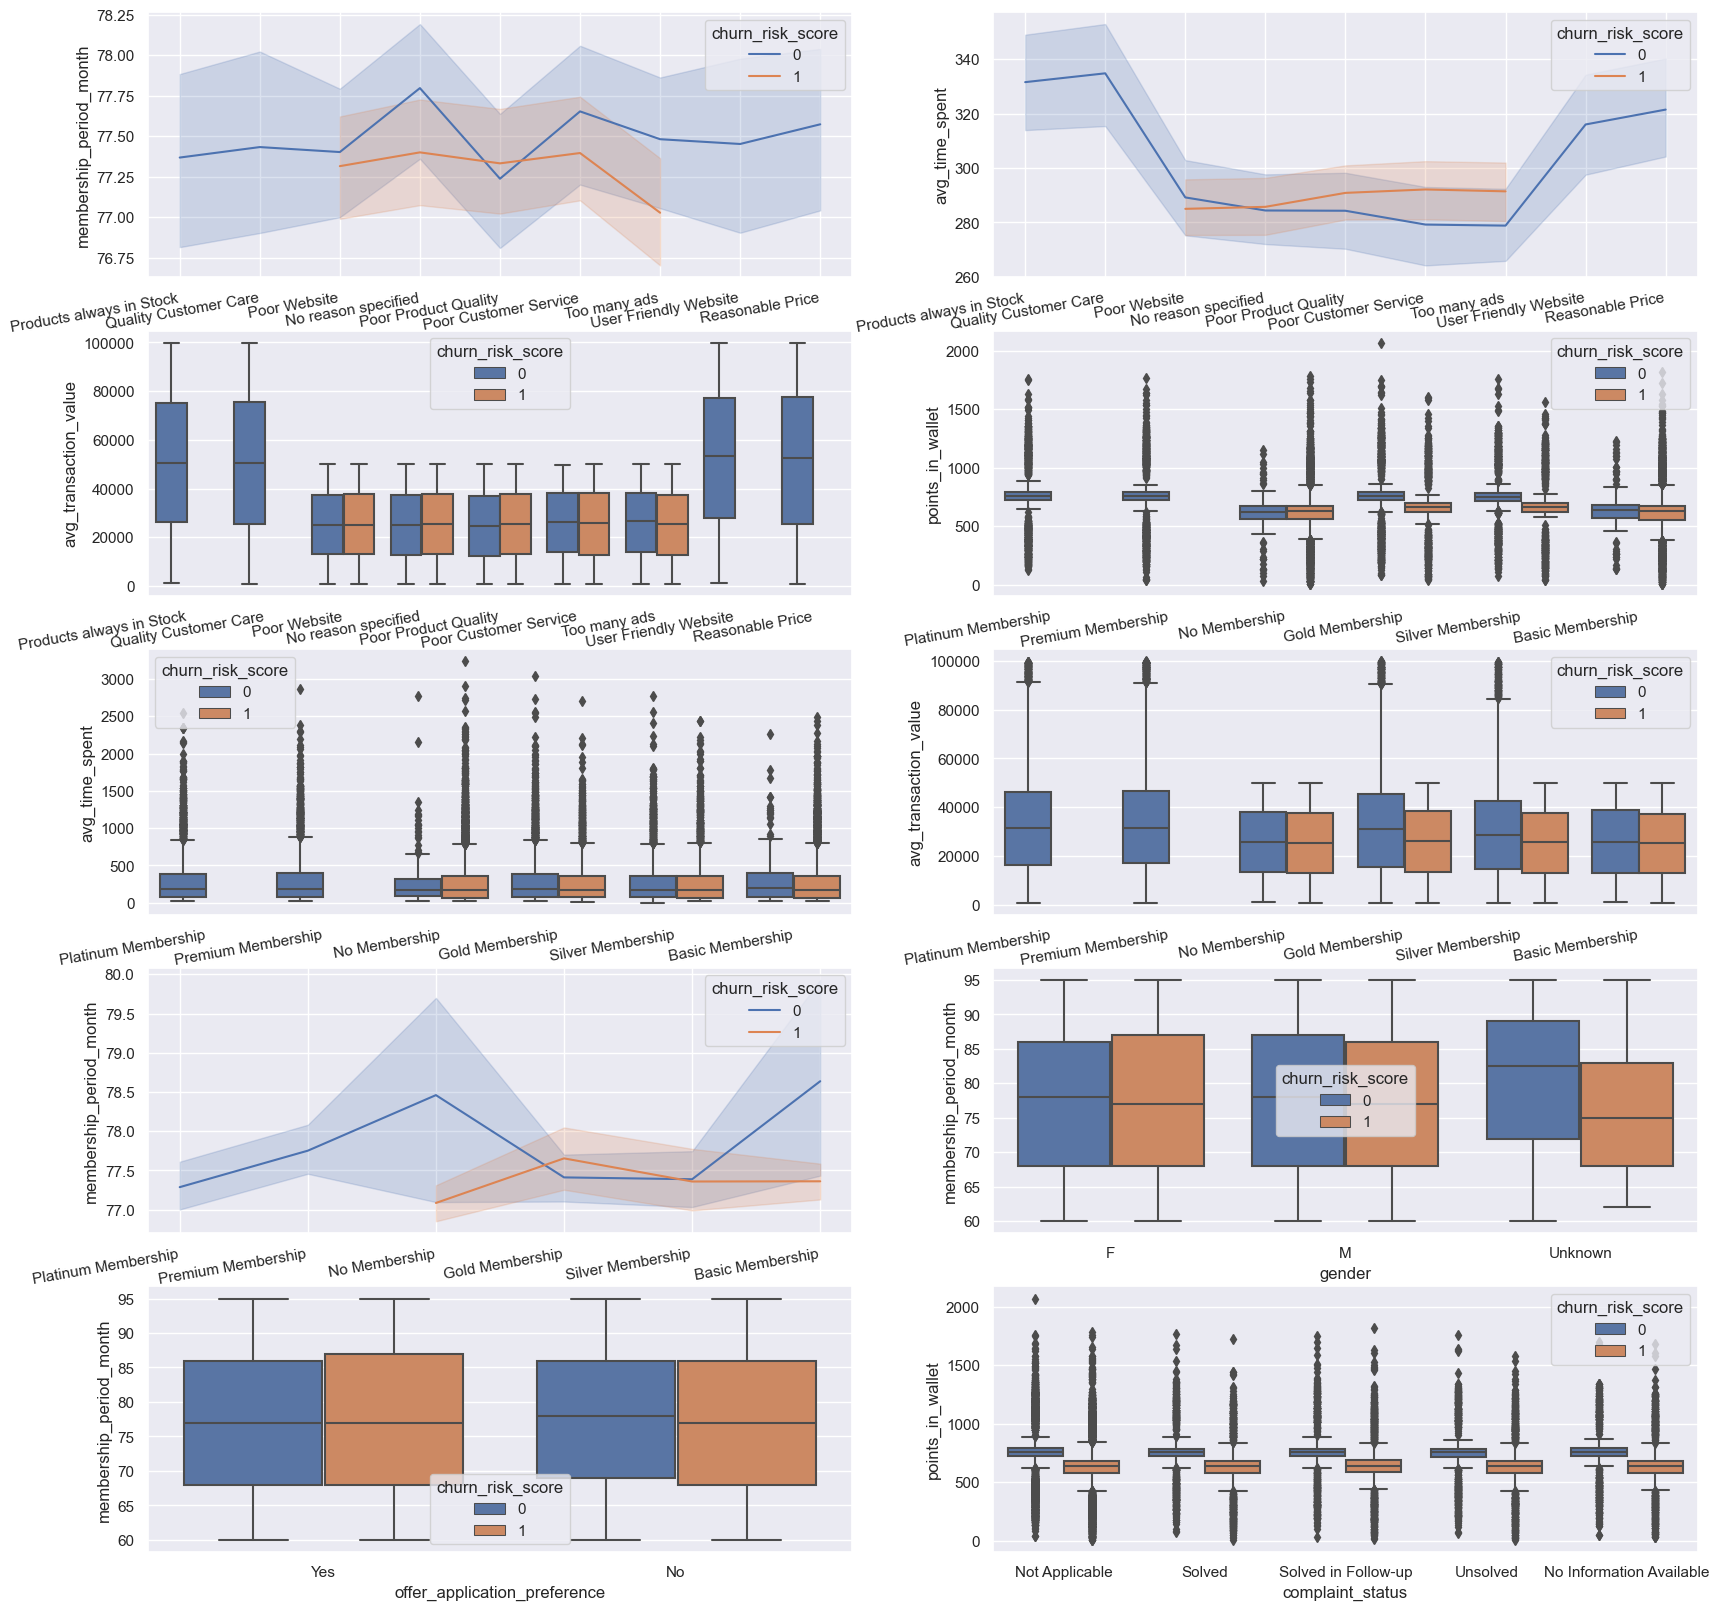

In [99]:
# plot out the interested features
sns.set()
fig, axes = plt.subplots(5,2, figsize=(20, 20))

sns.lineplot(data=df, x="feedback", y="membership_period_month", hue = 'churn_risk_score', ax=axes[0,0])
sns.lineplot(data=df, x="feedback", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[0,1])
sns.boxplot(data=df, x="feedback", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[1,0])
sns.boxplot(data=df, x="membership_category", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[1,1])
sns.boxplot(data=df, x="membership_category", y="avg_time_spent", hue = 'churn_risk_score', ax=axes[2,0])
sns.boxplot(data=df, x="membership_category", y="avg_transaction_value", hue = 'churn_risk_score', ax=axes[2,1])
sns.lineplot(data=df, x="membership_category", y="membership_period_month", hue = 'churn_risk_score', ax=axes[3,0])
sns.boxplot(data=df, x="gender", y="membership_period_month", hue = 'churn_risk_score', ax=axes[3,1])
sns.boxplot(data=df, x="offer_application_preference", y="membership_period_month", hue = 'churn_risk_score', ax=axes[4,0])
sns.boxplot(data=df, x="complaint_status", y="points_in_wallet", hue = 'churn_risk_score', ax=axes[4,1])


axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(), rotation=10, horizontalalignment='right')
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(), rotation=10, horizontalalignment='right')

# Modeling: end-to-end pipeline

In [248]:
X_train.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,membership_period_month,CID43705,CID3979,CID49601,CID15792,CID23978,CID40797,CID49598,CID62015,CID56219
34327,33,M,4TJROKF,City,Silver Membership,2015-06-08,unknown,CID42699,Credit/Debit Card Offers,Smartphone,...,90,0,0,0,0,0,0,0,0,0
22479,52,M,OAIBXFK,Town,Basic Membership,2017-07-25,No,Unknown,Gift Vouchers/Coupons,Desktop,...,65,0,0,0,0,0,0,0,0,0
4396,34,M,MNR4FE5,Town,No Membership,2015-01-27,Yes,CID63304,Without Offers,Desktop,...,95,0,0,0,0,0,0,0,0,0
14840,21,F,BJE2MQV,Town,Platinum Membership,2015-08-04,unknown,CID24029,Without Offers,Smartphone,...,88,0,0,0,0,0,0,0,0,0
1675,26,F,I5U7OOZ,City,Premium Membership,2017-10-22,No,Unknown,Without Offers,Smartphone,...,62,0,0,0,0,0,0,0,0,0


In [249]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25894 entries, 34327 to 15795
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           25894 non-null  int64  
 1   gender                        25894 non-null  object 
 2   security_no                   25894 non-null  object 
 3   region_category               22083 non-null  object 
 4   membership_category           25894 non-null  object 
 5   joining_date                  25894 non-null  object 
 6   joined_through_referral       25894 non-null  object 
 7   referral_id                   25894 non-null  object 
 8   preferred_offer_types         25699 non-null  object 
 9   medium_of_operation           25894 non-null  object 
 10  internet_option               25894 non-null  object 
 11  last_visit_time               25894 non-null  int64  
 12  days_since_last_login         24472 non-null  float64
 1

In [250]:
y_train

34327    1
22479    1
4396     1
14840    0
1675     0
        ..
16850    1
6265     1
11284    0
860      1
15795    1
Name: churn_risk_score, Length: 25894, dtype: int64

In [271]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Logistic Regression 

In [276]:
# preprocesser
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("encode", OneHotEncoder())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(numerical_columns)),
        ("cat", categorical_transformer, list(categorical_columns)),
    ]
)

# pipeline and model
steps = [('preprocess', preprocessor),
         ('lr', LogisticRegression())]

# model fit
model_lg = Pipeline(steps)
model_lg = model_lg.fit(X_train, y_train)

In [509]:
model_lg

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'last_visit_time',
                                                   'days_since_last_login',
                                                   'avg_time_spent',
                                                   'avg_transaction_value',
                                                   'avg_frequency_login_days',
                                                   'points_in_wallet',
                                                   'membership_period_month',
                                                   'CID43705', 'CID3979',
                                                   'CI...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  ['region_category', 'gender',
                                                   'used_special_discount',
                                                   'past_complaint',
                                                   'joined_through_referral',
                                                   'complaint_status',
                                                   'internet_option',
                                                   'membership_category',
                                                   'medium_of_operation',
                                                   'preferred_offer_types',
                                                   'feedback'])])),
                ('lr', LogisticRegression())])

In [503]:
feature_importances = pd.DataFrame(model_lg[-1].coef_[0], index = model_lg[:-1].get_feature_names_out())

<AxesSubplot: title={'center': 'Logistic Regression'}>

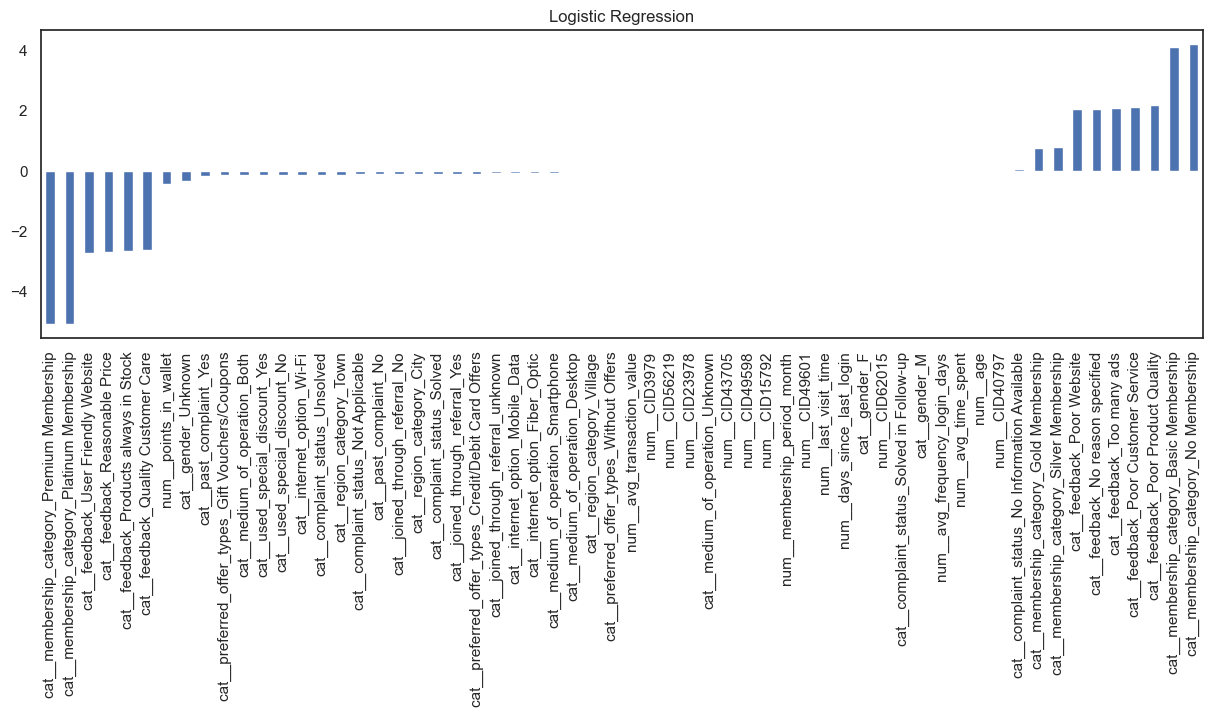

In [508]:
feature_importances[0].sort_values().plot(kind = 'bar', figsize=(15, 4), title = 'Logistic Regression')

In [541]:
# the probability of churn if no membership or basic membership
import math
1/(1+math.exp(-4))

0.8807970779778823

## Random Forest

In [280]:
# preprocesser
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("encode", OrdinalEncoder())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(numerical_columns)),
        ("cat", categorical_transformer, list(categorical_columns)),
    ]
)

# # parameter library
# parameters = {
#               'rf__max_depth': [3, 6, 9, 20, 50, 100], #default is None, which means infinity
#               'rf__min_samples_leaf': [1, 3, 5, 10, 20],
#               'rf__min_samples_split': [2, 3, 5, 8]
#              }
# # pipeline
# steps = [('preprocess', preprocessor),
#          ('rf', RandomForestClassifier(n_estimators=50, n_jobs=-1))]
          
# model = Pipeline(steps)

# # parameter turning
# model_rf = GridSearchCV(model,
#                          parameters,
#                          cv = 3,
#                          n_jobs=-1,
#                          return_train_score=True)

# # fit model
# model_rf = model_rf.fit(X_train, y_train)

# model_rf.best_params_
# #{'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2}

In [421]:
# pipeline
steps = [('preprocess', preprocessor),
         ('rf', RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=20, min_samples_leaf=1, min_samples_split=2))]

model = Pipeline(steps)
model_rf = model.fit(X_train, y_train)

In [510]:
model_rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'last_visit_time',
                                                   'days_since_last_login',
                                                   'avg_time_spent',
                                                   'avg_transaction_value',
                                                   'avg_frequency_login_days',
                                                   'points_in_wallet',
                                                   'membership_period_month',
                                                   'CID43705', 'CID3979',
                                                   'CI...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['region_category', 'gender',
                                                   'used_special_discount',
                                                   'past_complaint',
                                                   'joined_through_referral',
                                                   'complaint_status',
                                                   'internet_option',
                                                   'membership_category',
                                                   'medium_of_operation',
                                                   'preferred_offer_types',
                                                   'feedback'])])),
                ('rf',
                 RandomForestClassifier(max_depth=20, n_estimators=50,
                                        n_jobs=-1))])

In [497]:
feature_importances = pd.DataFrame(model_rf[1].feature_importances_, index = model_rf[:-1].get_feature_names_out())

<AxesSubplot: title={'center': 'Random Forest'}>

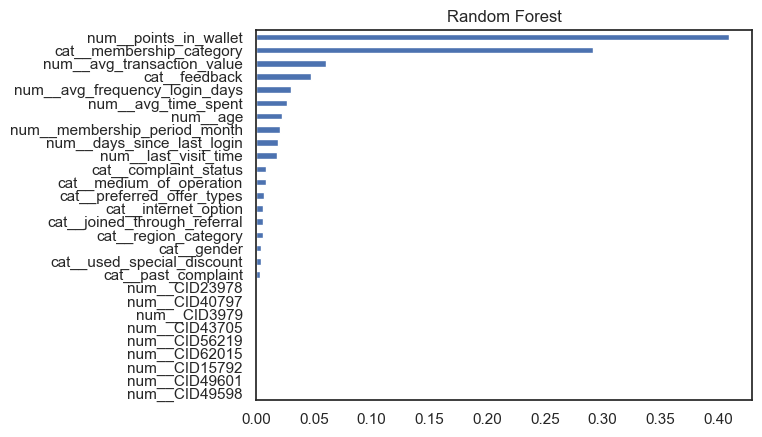

In [498]:
feature_importances[0].sort_values().plot(kind = 'barh', title = 'Random Forest')

## GB tree

In [408]:
# preprocesser
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("encode", OrdinalEncoder())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(numerical_columns)),
        ("cat", categorical_transformer, list(categorical_columns)),
    ]
)

# # uncomment below, if run gridSearchCV, note it takes 30 mins to run
# # parameters
# parameters = {'gbr__learning_rate': [0.1], 
#               'gbr__n_estimators': [100, 300, 500], 
#               'gbr__max_depth': [3, 5, 10], 
#               'gbr__min_samples_leaf': range(30, 150, 30), 
#               'gbr__min_samples_split': [2, 3, 5]}
# # pipeline
# steps = [('preprocess', preprocessor),
#          ('gbr', GradientBoostingClassifier())]
# model = Pipeline(steps)

# # parameter turning
# model_gbt = GridSearchCV(model, parameters, cv = 3,  n_jobs=-1)

# # fit model
# model_gbt = model_gbt.fit(X_train, y_train)

# model_gbt.best_params_
# # best parameters
# # {'gbr__learning_rate': 0.1,
# #  'gbr__max_depth': 5,
# #  'gbr__min_samples_leaf': 90,
# #  'gbr__min_samples_split': 2,
# #  'gbr__n_estimators': 100}

In [418]:
# pipeline
steps = [('preprocess', preprocessor),
         ('gbr', GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, 
                                            min_samples_leaf = 90, min_samples_split = 2, n_estimators = 100))]

model = Pipeline(steps)
model_gbt = model.fit(X_train, y_train)

In [511]:
model_gbt

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'last_visit_time',
                                                   'days_since_last_login',
                                                   'avg_time_spent',
                                                   'avg_transaction_value',
                                                   'avg_frequency_login_days',
                                                   'points_in_wallet',
                                                   'membership_period_month',
                                                   'CID43705', 'CID3979',
                                                   'CI...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['region_category', 'gender',
                                                   'used_special_discount',
                                                   'past_complaint',
                                                   'joined_through_referral',
                                                   'complaint_status',
                                                   'internet_option',
                                                   'membership_category',
                                                   'medium_of_operation',
                                                   'preferred_offer_types',
                                                   'feedback'])])),
                ('gbr',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=90))])

In [499]:
feature_importances = pd.DataFrame(model_gbt[1].feature_importances_, index = model_gbt[:-1].get_feature_names_out())

<AxesSubplot: title={'center': 'GB tree'}>

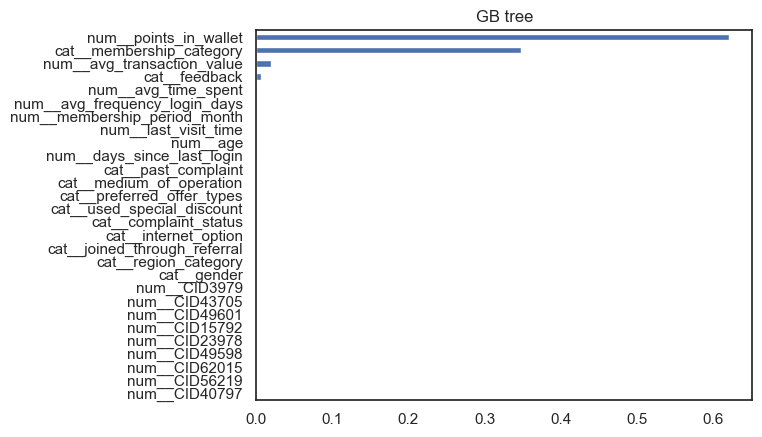

In [500]:
feature_importances[0].sort_values().plot(kind = 'barh', title = 'GB tree')

## XGboost

In [272]:
# preprocesser
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("encode", OrdinalEncoder())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(numerical_columns)),
        ("cat", categorical_transformer, list(categorical_columns)),
    ]
)

# pipleine
steps = [('prerpocessor', preprocessor),
         ('xgbr', XGBClassifier())]    
model = Pipeline(steps)

# fit model
model_xgboost = model.fit(X_train, y_train)

In [512]:
model_xgboost

Pipeline(steps=[('prerpocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'last_visit_time',
                                                   'days_since_last_login',
                                                   'avg_time_spent',
                                                   'avg_transaction_value',
                                                   'avg_frequency_login_days',
                                                   'points_in_wallet',
                                                   'membership_period_month',
                                                   'CID43705', 'CID3979',
                                                   '...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [501]:
feature_importances = pd.DataFrame(model_xgboost[1].feature_importances_, 
                                   index = model_xgboost[:-1].get_feature_names_out())

<AxesSubplot: title={'center': 'XGboost'}>

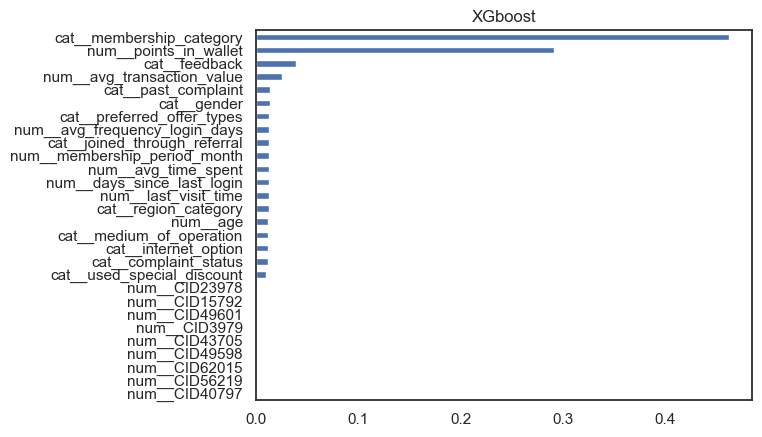

In [502]:
feature_importances[0].sort_values().plot(kind = 'barh', title = 'XGboost')

##  ROC AUC

XBoost is the best model

In [290]:
from sklearn.metrics import roc_auc_score
print('---------- logistic regression model -------------')
print('Training data:', roc_auc_score(y_train, model_lg.predict_proba(X_train)[:, 1]))
print('Test data:', roc_auc_score(y_test, model_lg.predict_proba(X_test)[:, 1]))
print('---------- Random Forest model -------------')
print('Training data:', roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1]))
print('Test data:', roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]))
print('---------- Gradient boosting tree model -------------')
print('Training data:', roc_auc_score(y_train, model_gbt.predict_proba(X_train)[:, 1]))
print('Test data:', roc_auc_score(y_test, model_gbt.predict_proba(X_test)[:, 1]))
print('---------- XGboost model -------------')
print('Training data:', roc_auc_score(y_train, model_xgboost.predict_proba(X_train)[:, 1]))
print('Test data:', roc_auc_score(y_test, model_xgboost.predict_proba(X_test)[:, 1]))

---------- logistic regression model -------------
Training data: 0.9613767581175725
Test data: 0.9601703026351278
---------- Random Forest model -------------
Training data: 0.9999713701133904
Test data: 0.9737598984233226
---------- Gradient boosting tree model -------------
Training data: 0.9869054558898516
Test data: 0.9763996580068556
---------- XGboost model -------------
Training data: 0.9982313946079424
Test data: 0.9760396617776834


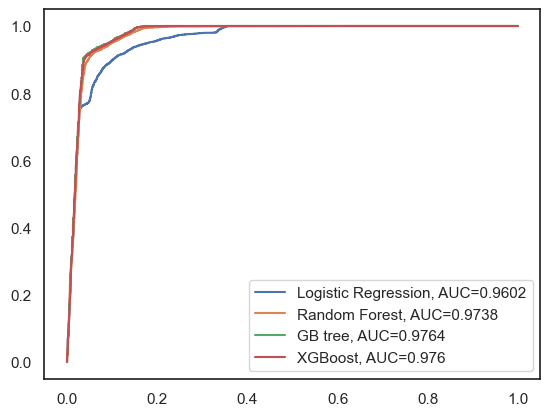

In [298]:
from sklearn import metrics

plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, model_lg.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model_lg.predict_proba(X_test)[:,1]), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, model_gbt.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model_gbt.predict_proba(X_test)[:,1]), 4)
plt.plot(fpr,tpr,label="GB tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, model_xgboost.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model_xgboost.predict_proba(X_test)[:,1]), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

plt.legend()

## Confusing matrix

In [302]:
from sklearn.metrics import classification_report

print('------------------- Logistic Rregression -------------------')
target_names = ['0', '1']
y_test_pred= model_lg.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

print('------------------- Random Forest -------------------')
target_names = ['0', '1']
y_test_pred= model_rf.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

print('------------------- GB tree  -------------------')
target_names = ['0', '1']
y_test_pred= model_gbt.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

print('------------------- XGboost -------------------')
target_names = ['0', '1']
y_test_pred= model_xgboost.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

------------------- Logistic Rregression -------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5058
           1       0.92      0.89      0.90      6040

    accuracy                           0.90     11098
   macro avg       0.90      0.90      0.90     11098
weighted avg       0.90      0.90      0.90     11098

------------------- Random Forest -------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5058
           1       0.92      0.94      0.93      6040

    accuracy                           0.93     11098
   macro avg       0.93      0.93      0.93     11098
weighted avg       0.93      0.93      0.93     11098

------------------- GB tree  -------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5058
           1       0.93      0.95      0.94      6040

    accuracy      

## Colusion:

**GB tree has the overall highest the recall and accuracy**

We want to go with high recall, when recall is same we want high accuracy. Thus, according to the confusing matric, we will select the GB tree as the predictive model to predict if the customer will churn or not.

Now the 'recall' we can reach is 95%, which means using this model we can identified 95% of churning customer. If a good promoiotion/business strategy can be 100% effective to retian the leaving ones, then we can bring the churn rate down to (1-95%)*54% = 2.7%.


**Logstic Regression is simplest model**

Logistic Regression is simplist model for identify the leaving customer, and easy to explain how the features are constribute to the customer churn. The recall is 0.89%, which is lower than than the GB. So, if customer want to use this model, the 'recall' will be 89%. If a good promoiotion/business strategy can be 100% effective to retian the leaving ones, then we can bring the churn rate down to (1-89%)*54% = 5.94%.


**Feature importances**
For all the tree based model, we can see the plot above that "point in the wallet" and "membership catagory" are the top importance features which take great responsibility of customer leaving or not.

1) Customers  are likely to leave if they are or feel (rack):
No membership
Basic membership
Poor Customer service
Too many ads
No reason (they don’ care)
Poor website

2) Customers below are unlikely to leave, if they are or feel (rank):
Premium Membership
Platinum membership 
Friendly website
Reasonable price
Product in stock
Quality customer care



# Extra: How churn allocates within different grouup

In [ ]:
temp = df
#temp = temp[temp['gender'] != 'Unknown']

In [ ]:
# we can see that gender data has not effect by gender so we will drop this feature
temp.groupby('gender')['churn_risk_score'].mean().plot(kind = 'bar', ylim=(0,1), title = 'Churn risk between geneders')

In [ ]:
# age dose not effect, so we will drop age
temp.groupby('age')['churn_risk_score'].mean().plot(ylim=(0,1), title = 'Churn risk among ages')

In [ ]:
temp.groupby('membership_category')['churn_risk_score'].mean().plot(kind = 'bar',ylim=(0,1), title = 'Churn risk membership catagories')

In [ ]:
df[df.membership_category != 'No Membership']['churn_risk_score'].mean()

In [ ]:
df[df.membership_category != 'No Membership'].shape

# Extra:  Generate imbalance data (give a valuie to 'seed' to change the churn rate)

In [ ]:
seed = 2000
churn = df[df.churn_risk_score == 1]
not_churn = df[df.churn_risk_score == 0]
churn_down_sample = churn.sample(n=seed, random_state = 1)
new_df = pd.concat([not_churn, churn_down_sample], axis=0)
print('The shape of the new data:',  new_df.shape)
print('The new churn rate is:',  churn_down_sample.shape[0]/(churn_down_sample.shape[0]+df.shape[0]))

In [ ]:
new_df.describe()